# Economic Indicators Exploratory Data Analysis

This notebook contains descriptive analysis of the panel dataset for Latin American countries from 2003-2023.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Import custom helper functions
import sys
sys.path.append("/Users/lnt/Desktop/Lumos/project/src/utils")
from helpers import plot_missing

## Load the panel dataset

In [2]:
# Load the processed panel dataset
panel = pd.read_csv("../../data/processed/panel_2003_2023.csv")

# Display basic information
print(f"Dataset shape: {panel.shape}")
panel.head()

Dataset shape: (357, 13)


,Country,Year,gdpgrowth,gini,wealth,gii,ruleoflaw,lnpovhead215,lngovt,lntradeopen,fii,lninflation,lnenrollment
0,Mexico,2003,1.185545,NaN,0.6878,0.435,-0.377903,NaN,2.442177,3.906013,NaN,1.713239,4.376438
1,Mexico,2004,3.565441,50.3,0.7010,0.433,-0.409910,2.104134,2.399365,3.971058,0.292935,1.738431,4.391763
2,Mexico,2005,2.113247,50.9,0.6994,0.425,-0.382990,2.174752,2.404801,3.980852,0.302580,1.607046,4.402203
3,Mexico,2006,4.805014,49.7,0.6977,0.430,-0.472546,1.856298,2.388042,4.016061,0.327670,1.532442,4.427256
4,Mexico,2007,2.077864,NaN,0.7068,0.430,-0.542932,NaN,2.393147,4.029958,0.357476,1.602786,4.443694


## Missing Data Analysis

Let's examine missing data in our poverty indicators.
- `lnpovhead215`: Poverty headcount ratio at $2.15 a day (2017 PPP)

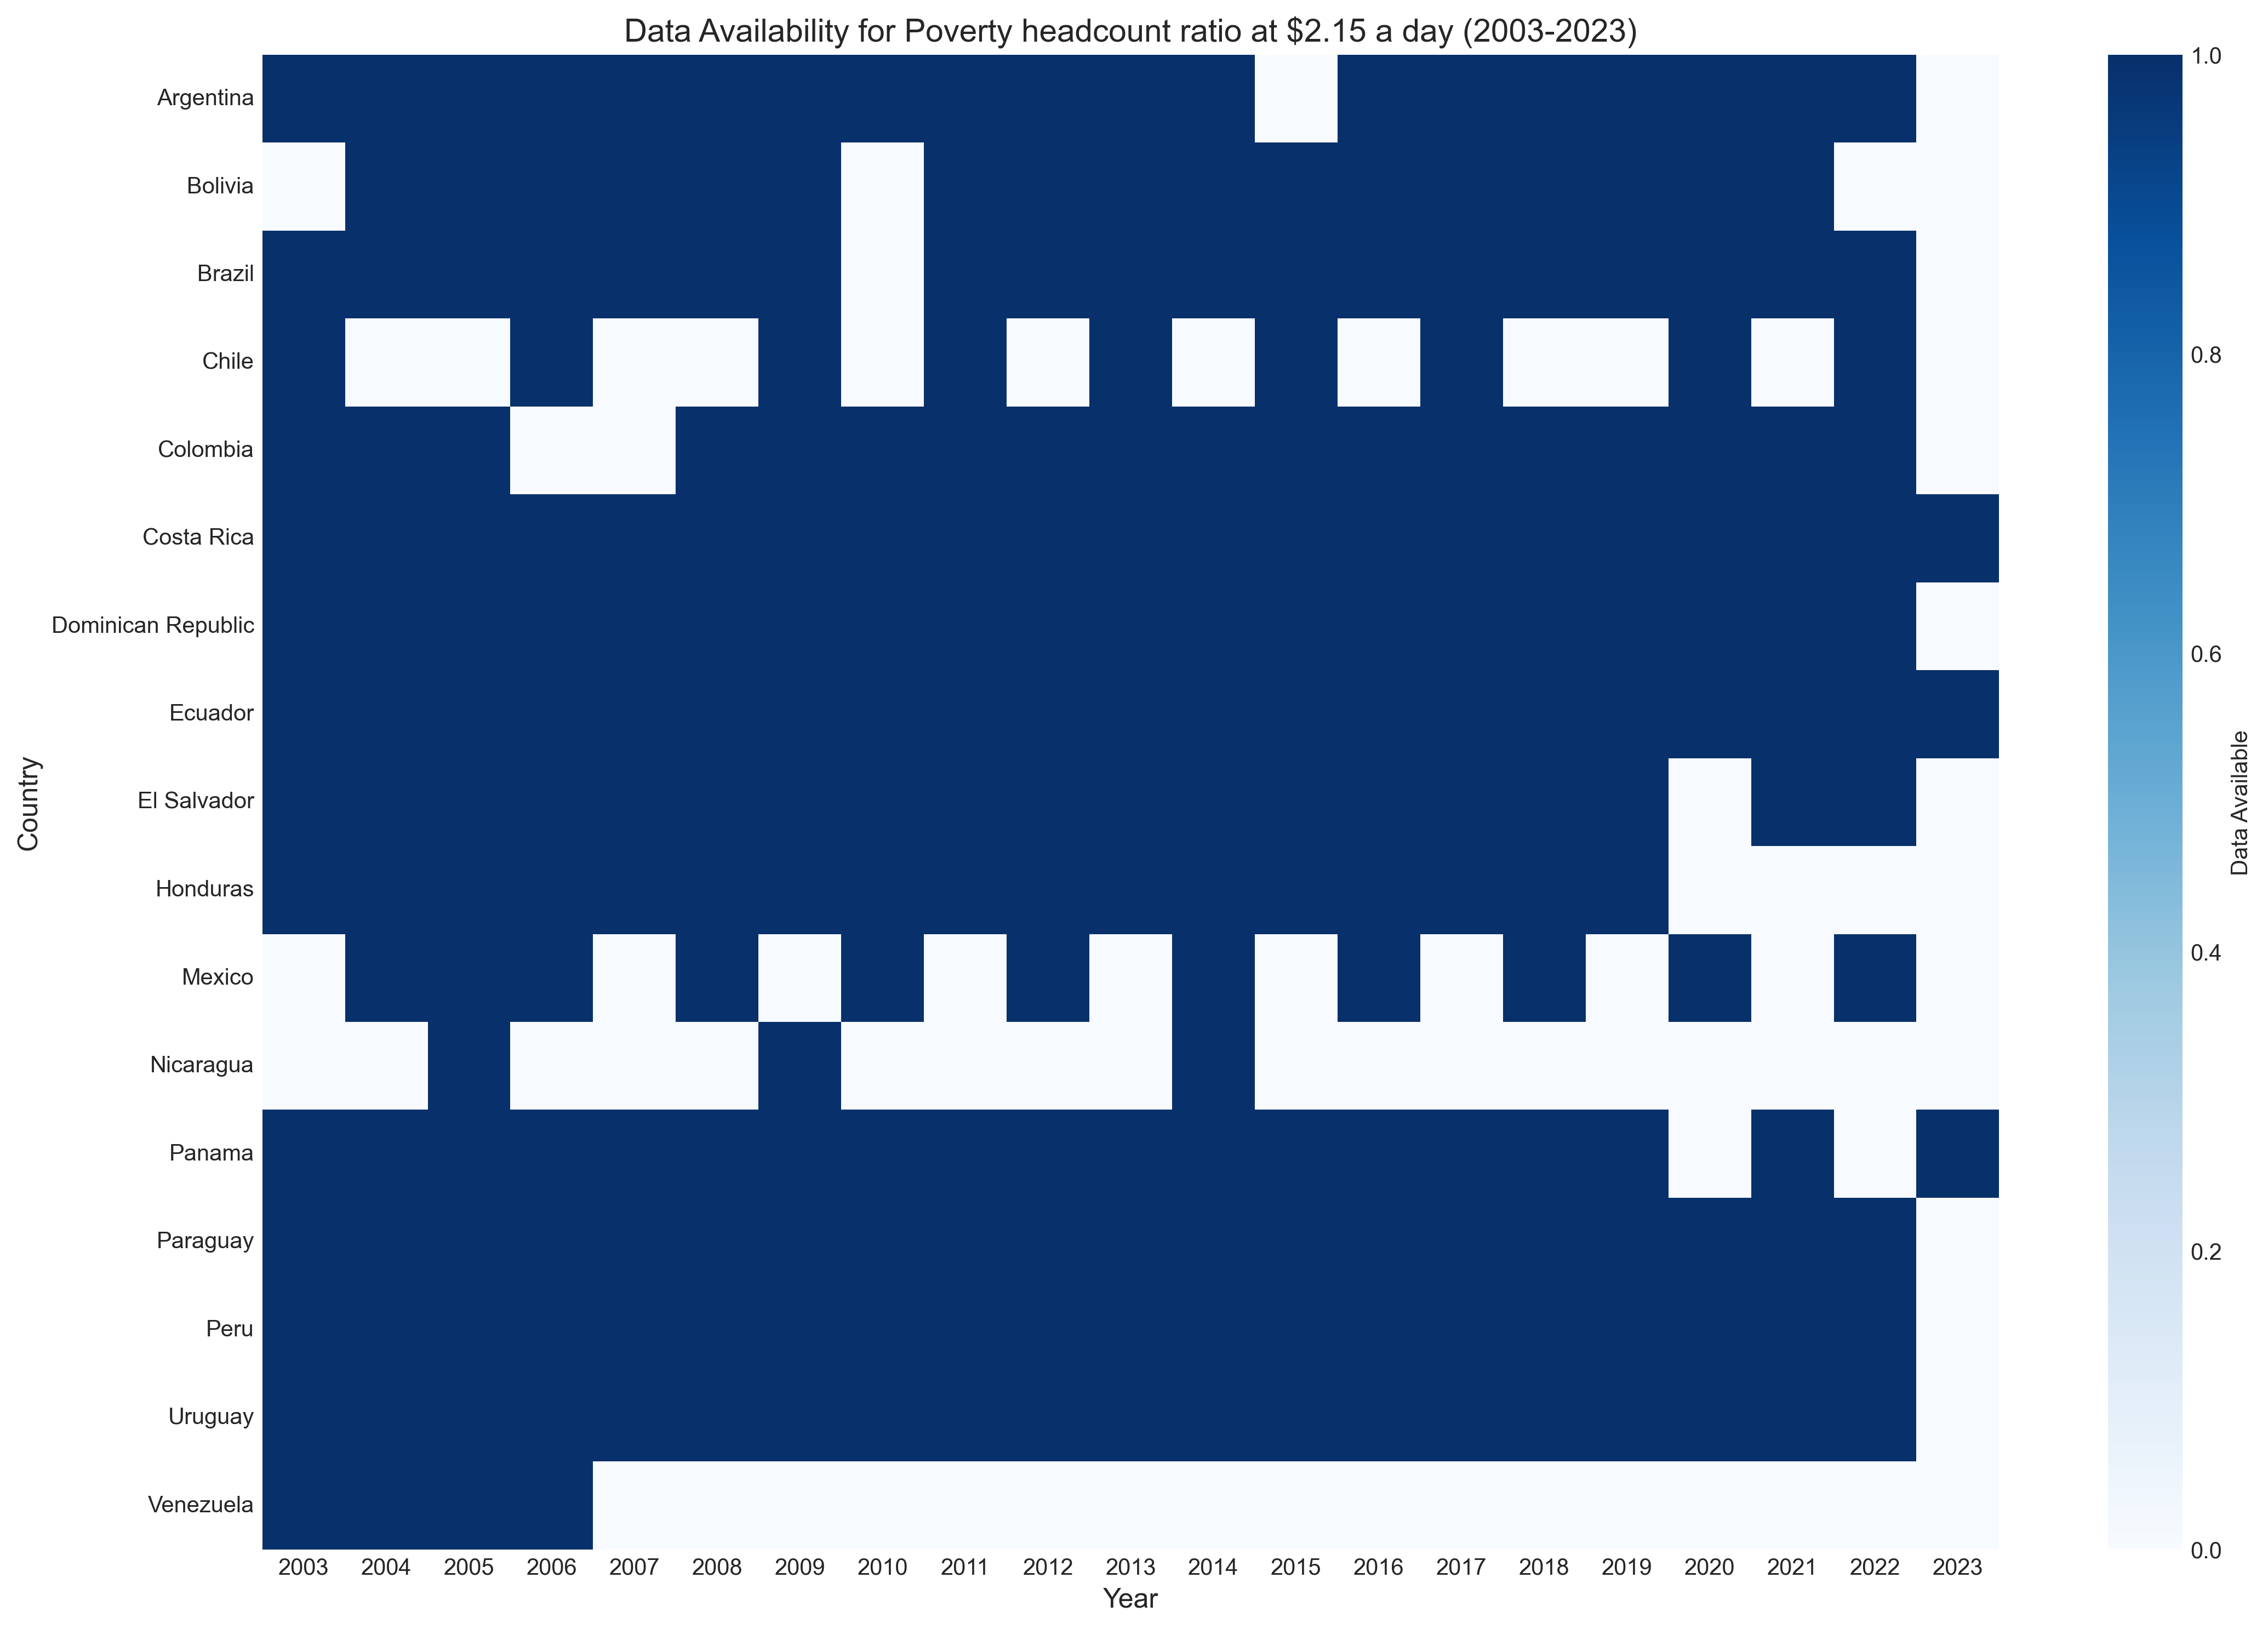

In [3]:
# Visualize missing data for 'lnpovhead'
plot_missing(panel[['Country', 'Year', 'lnpovhead215']],
             "../../reports/figures/missing_poverty_lnpovhead215.png")

# Display the image in the notebook
from IPython.display import Image
Image("../../reports/figures/missing_poverty_lnpovhead215.png")

## Overall Missing Data

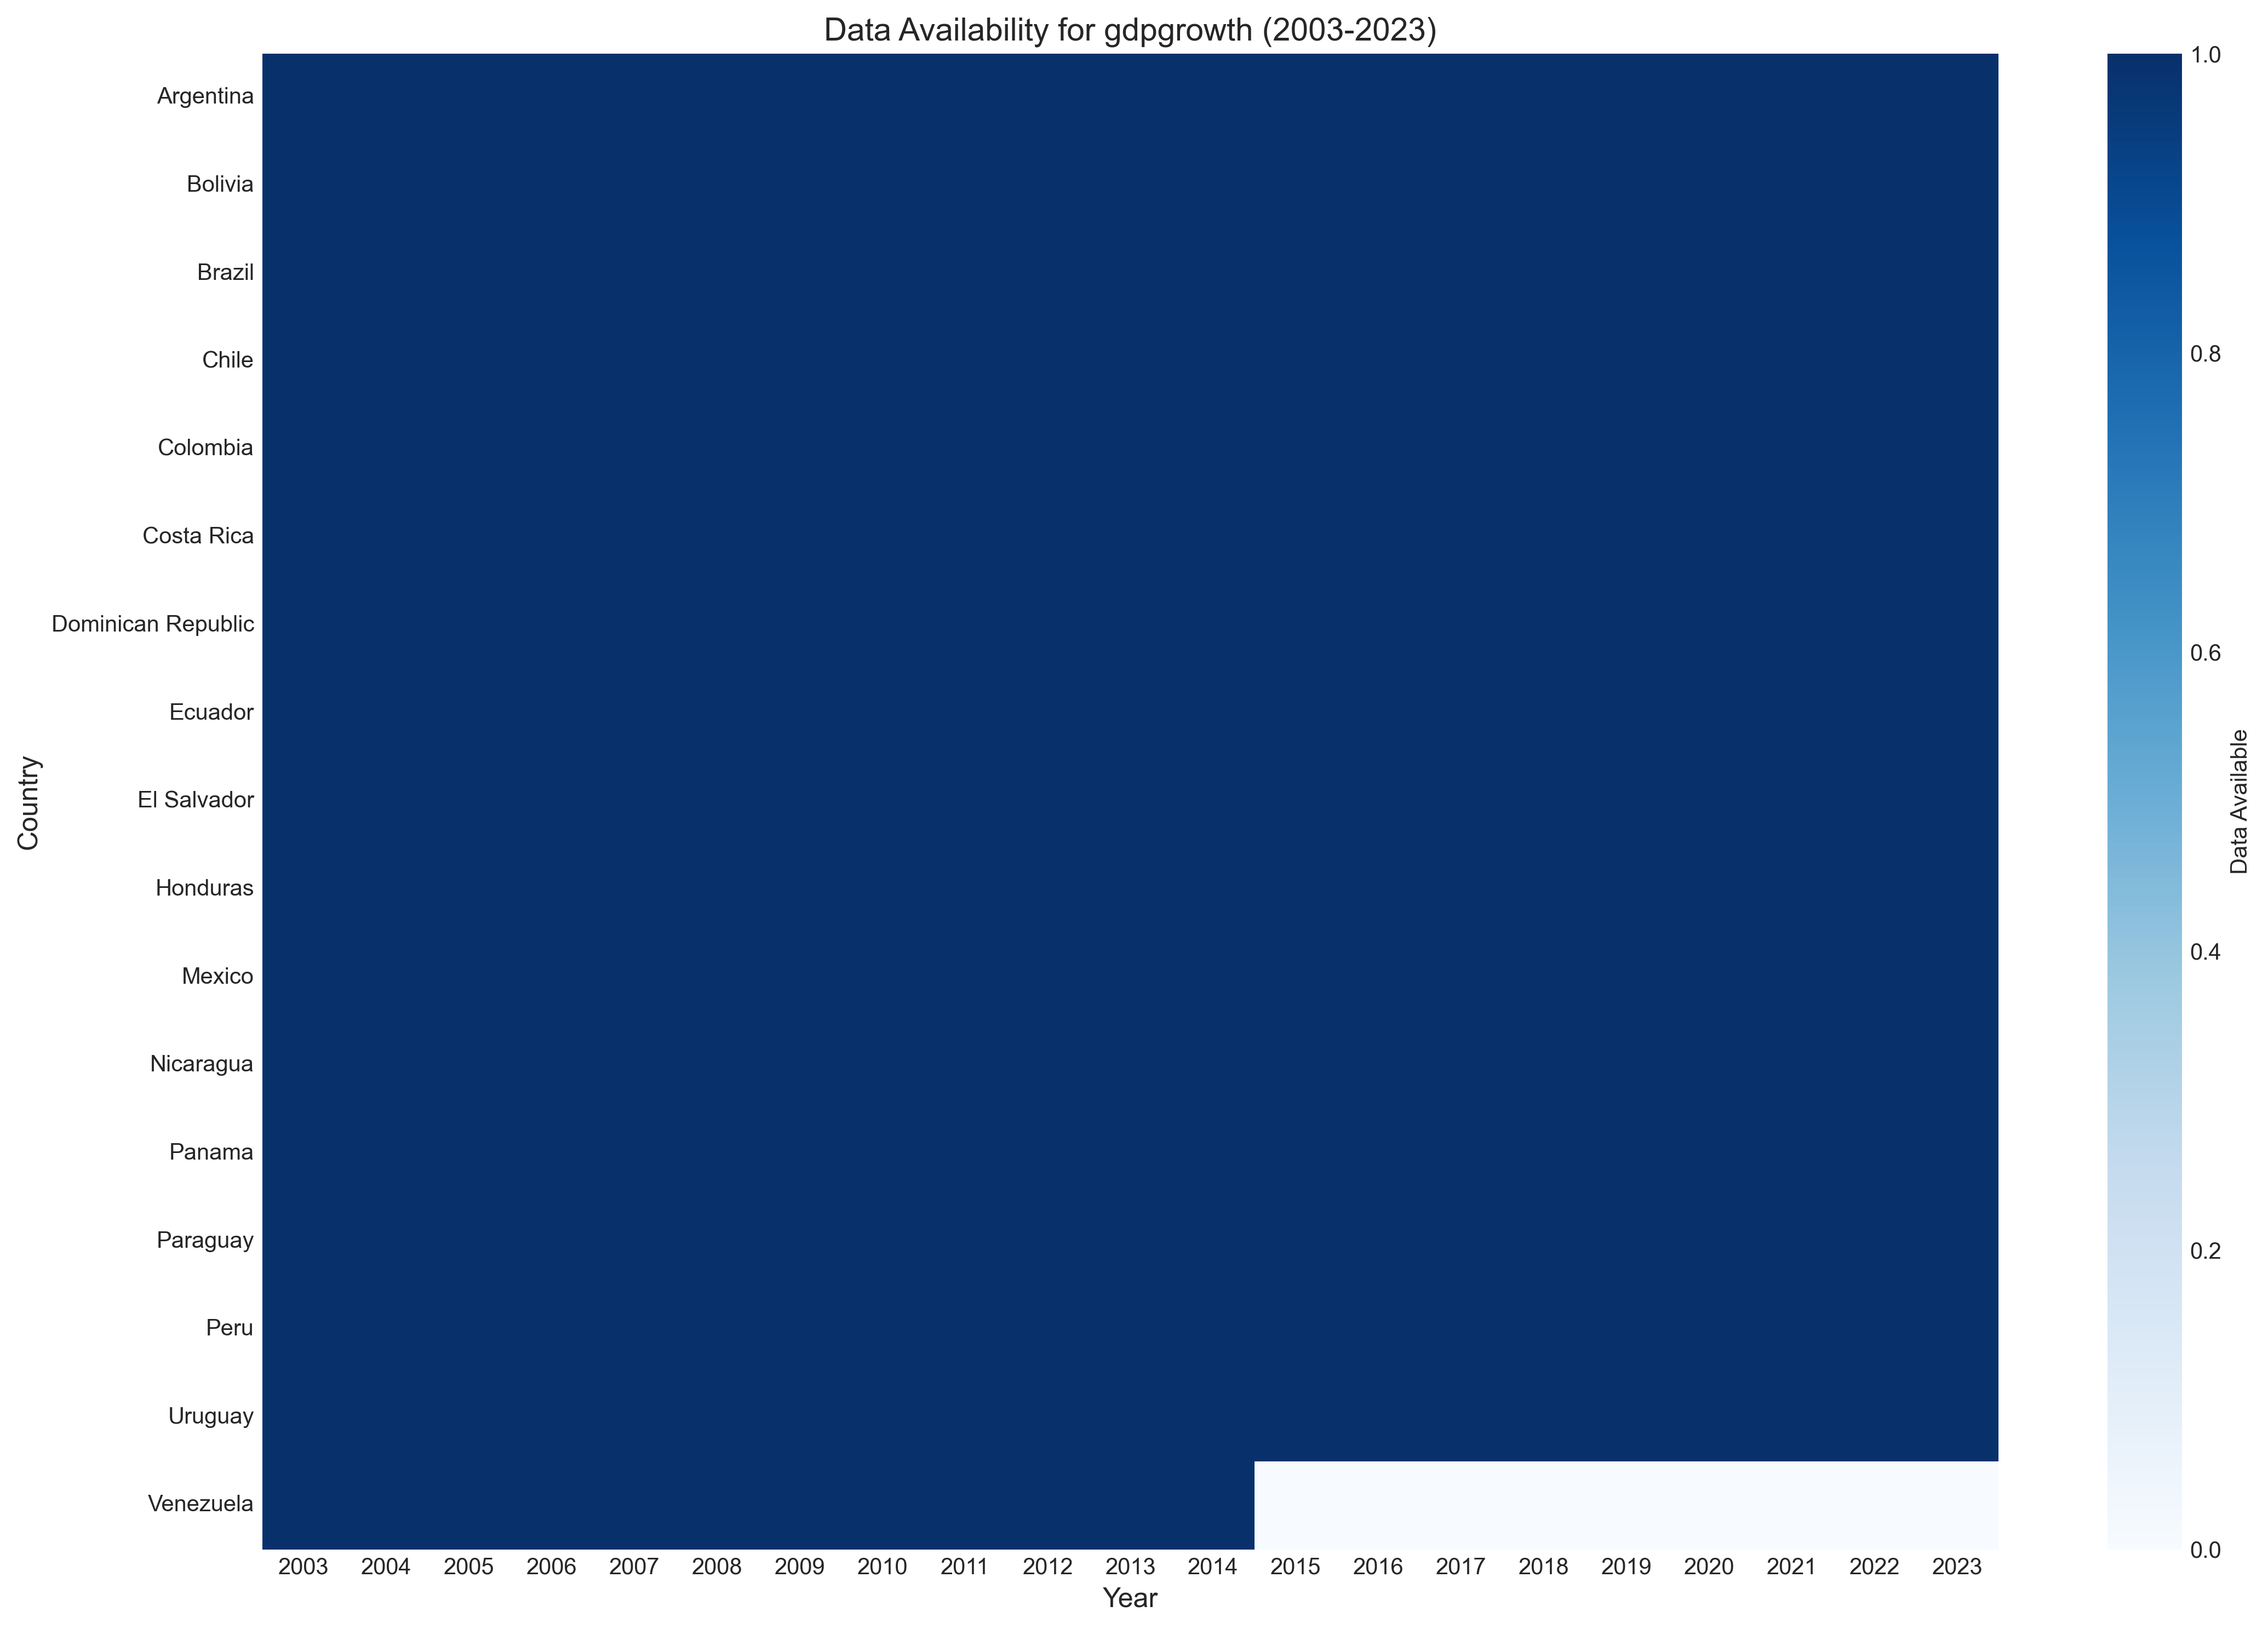

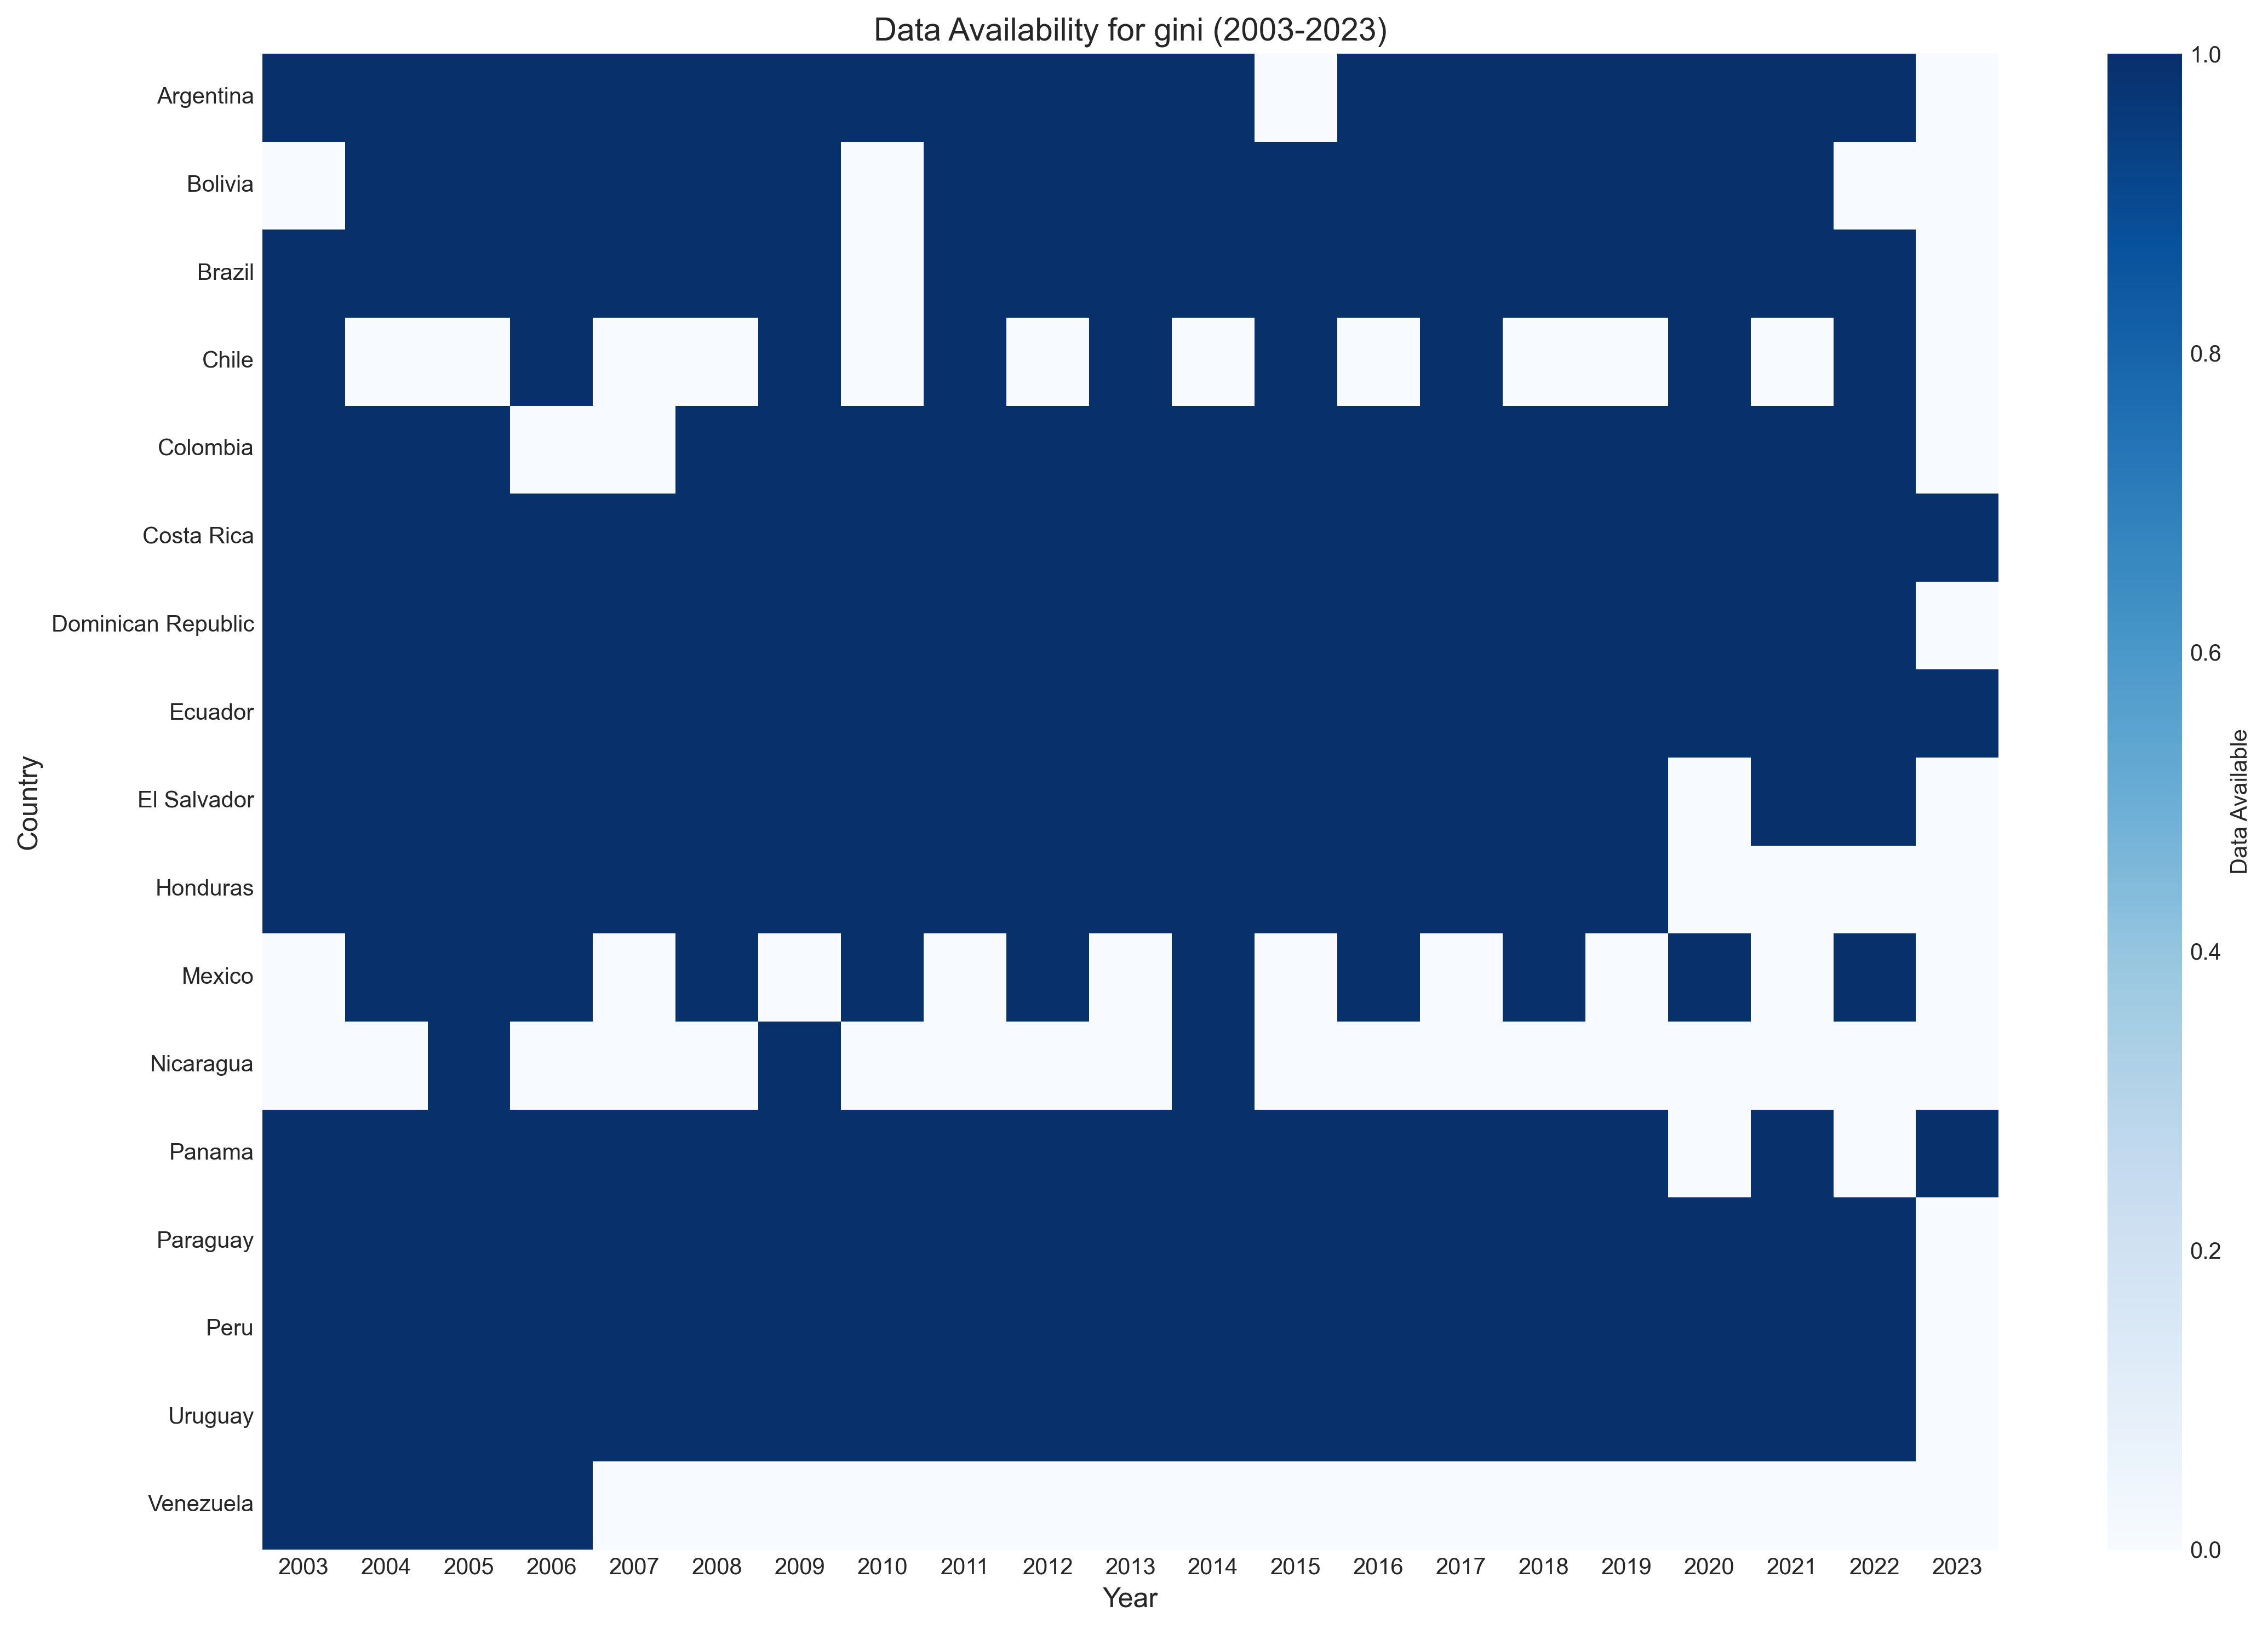

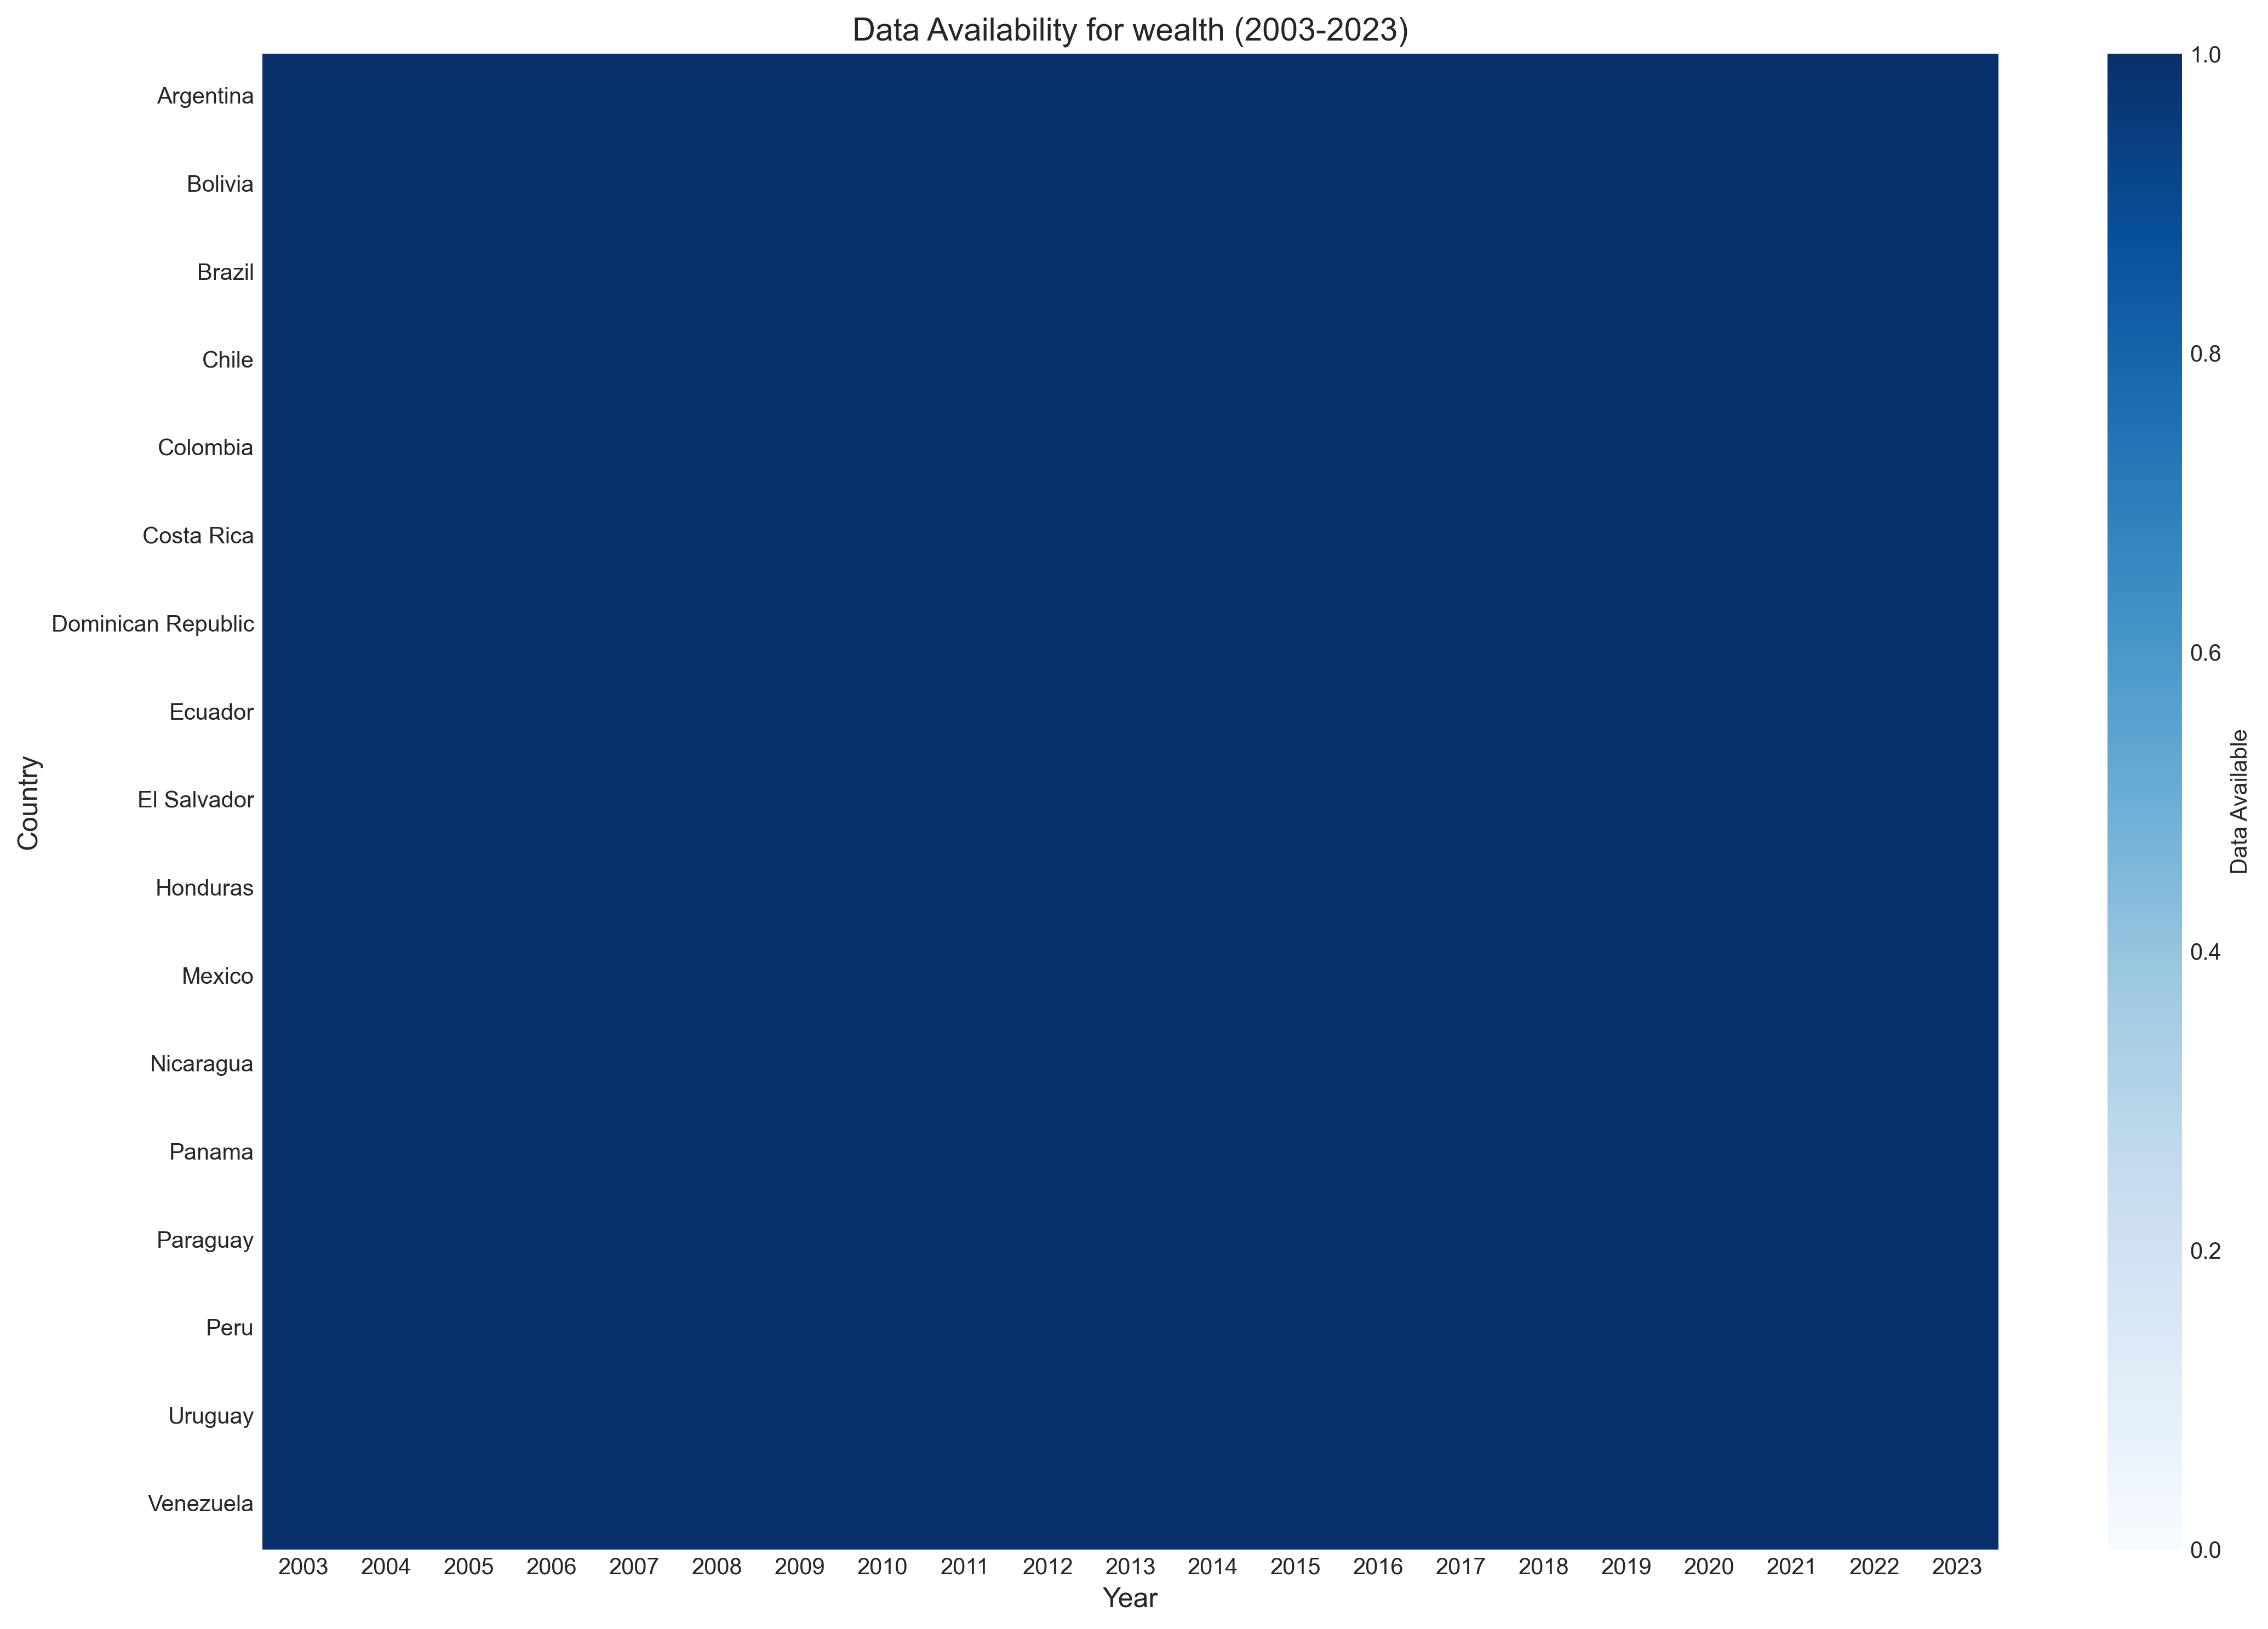

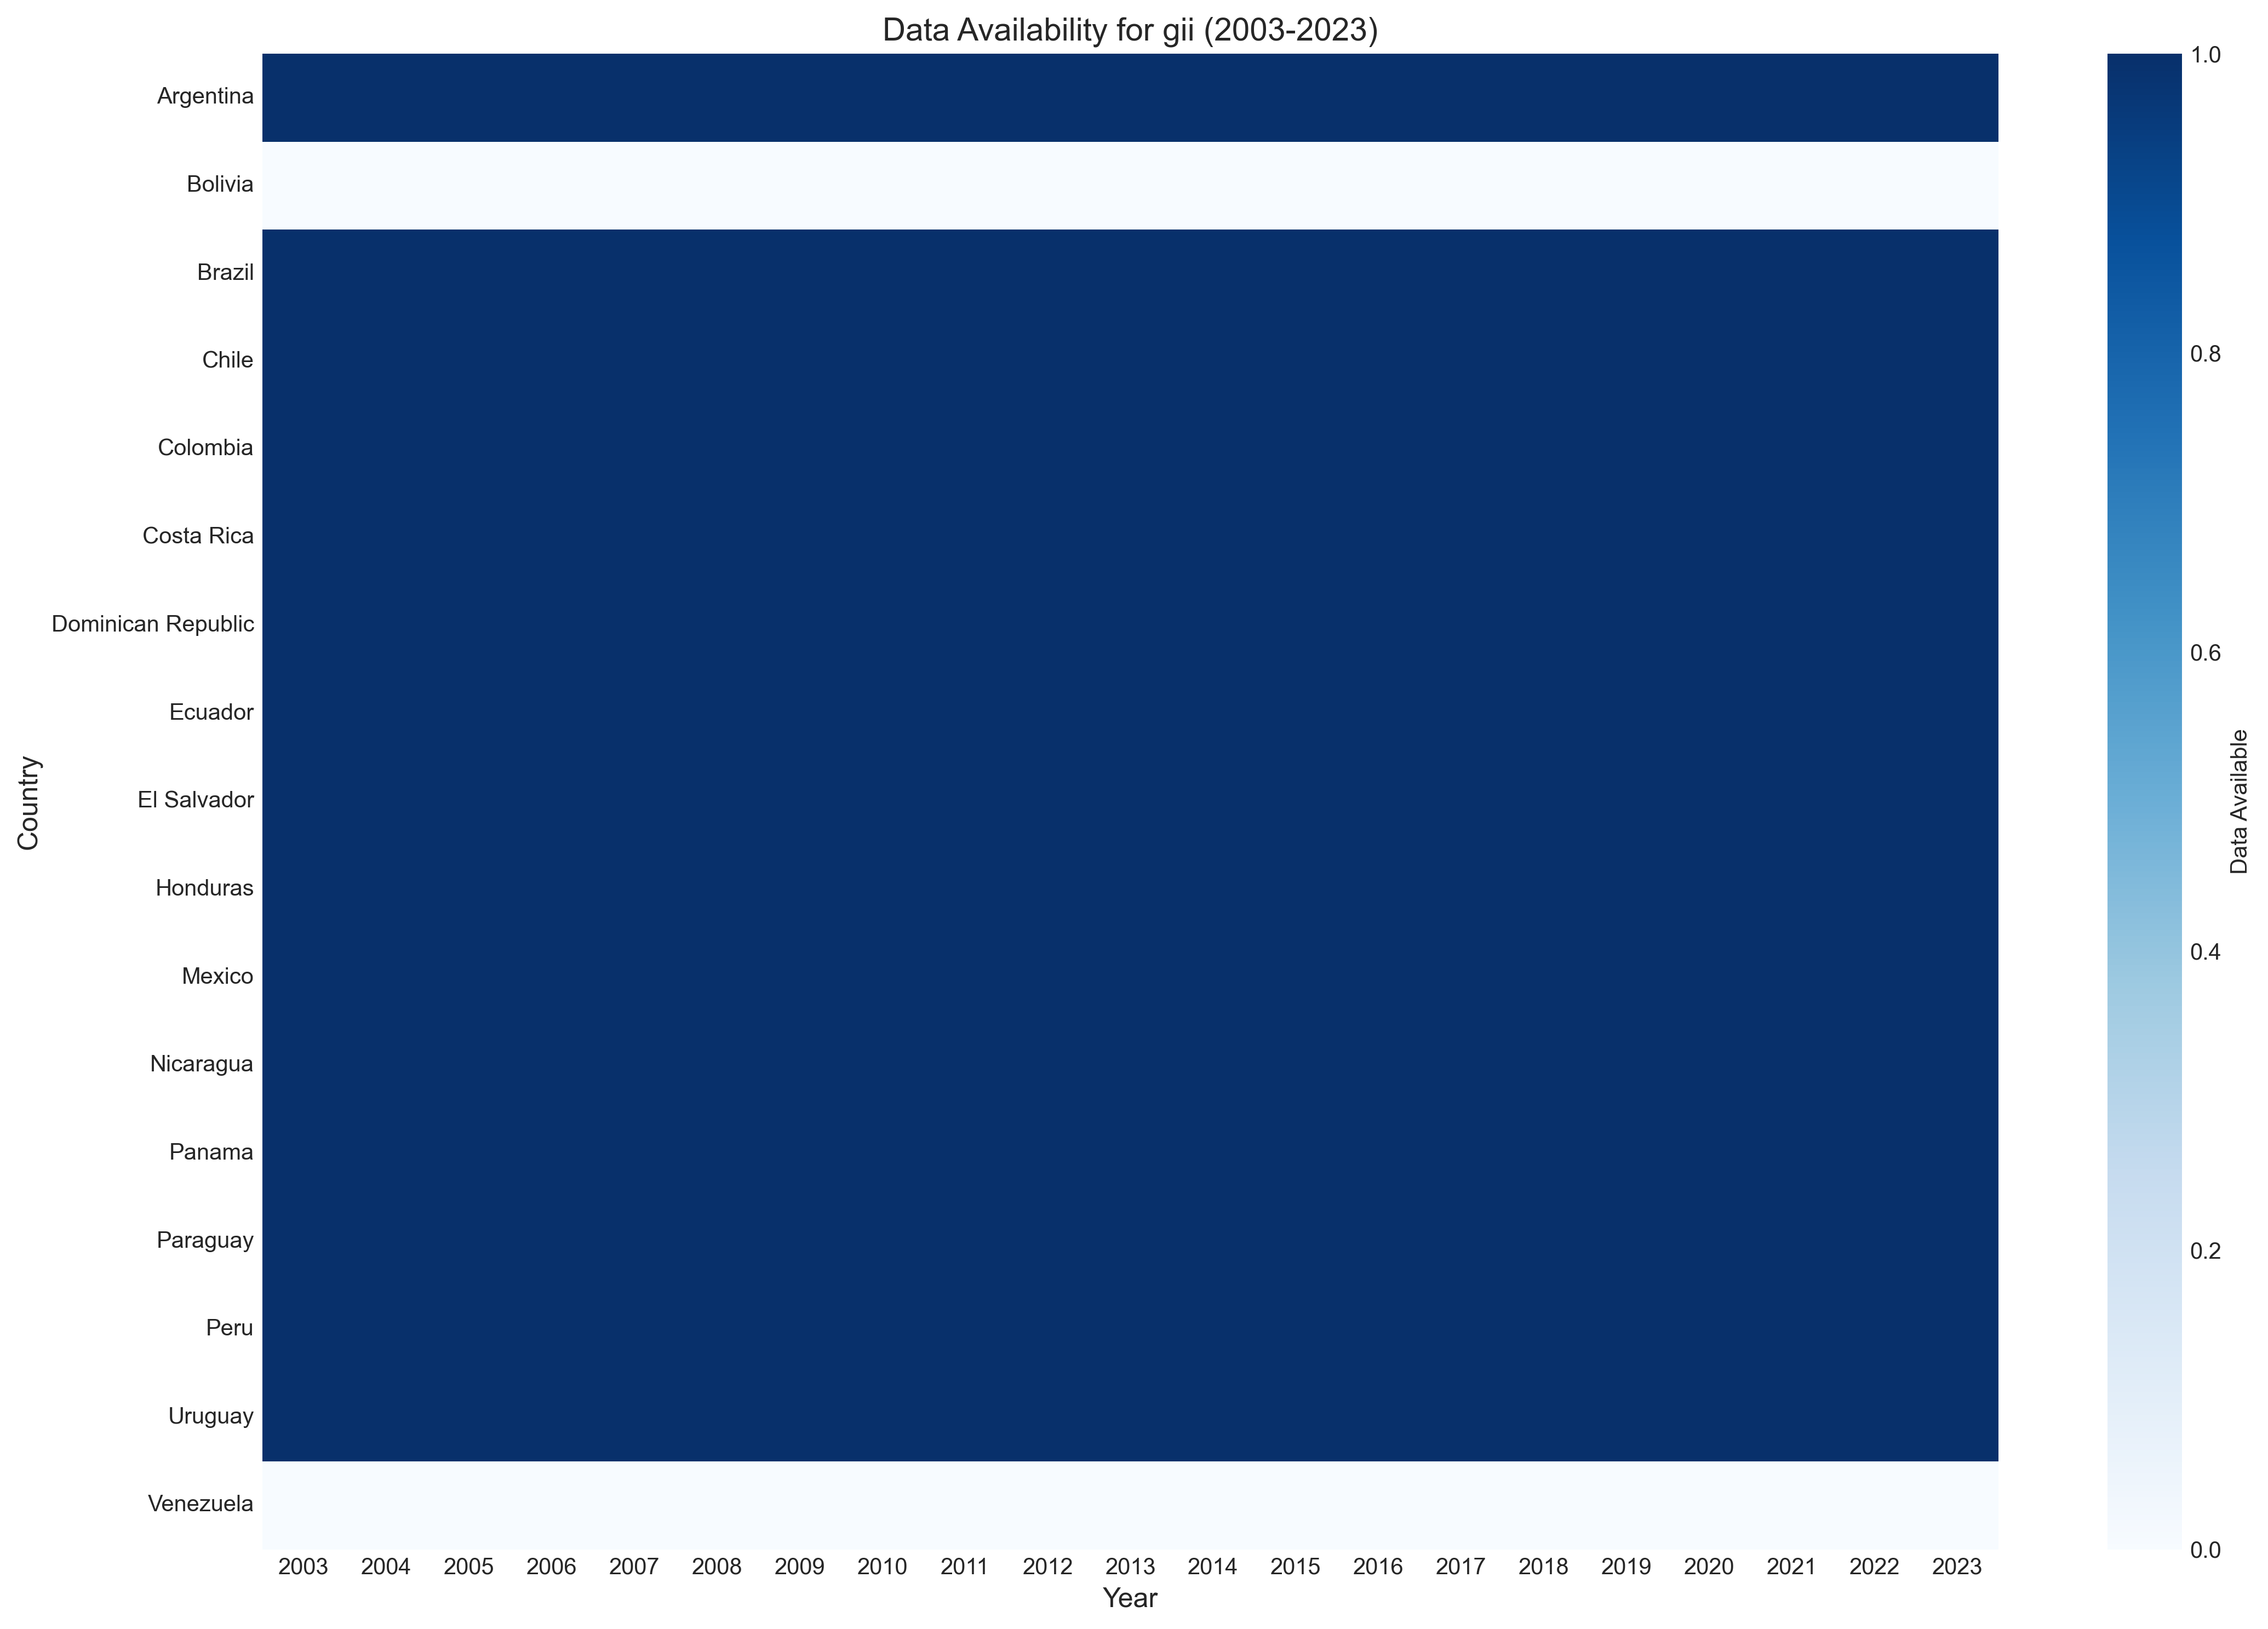

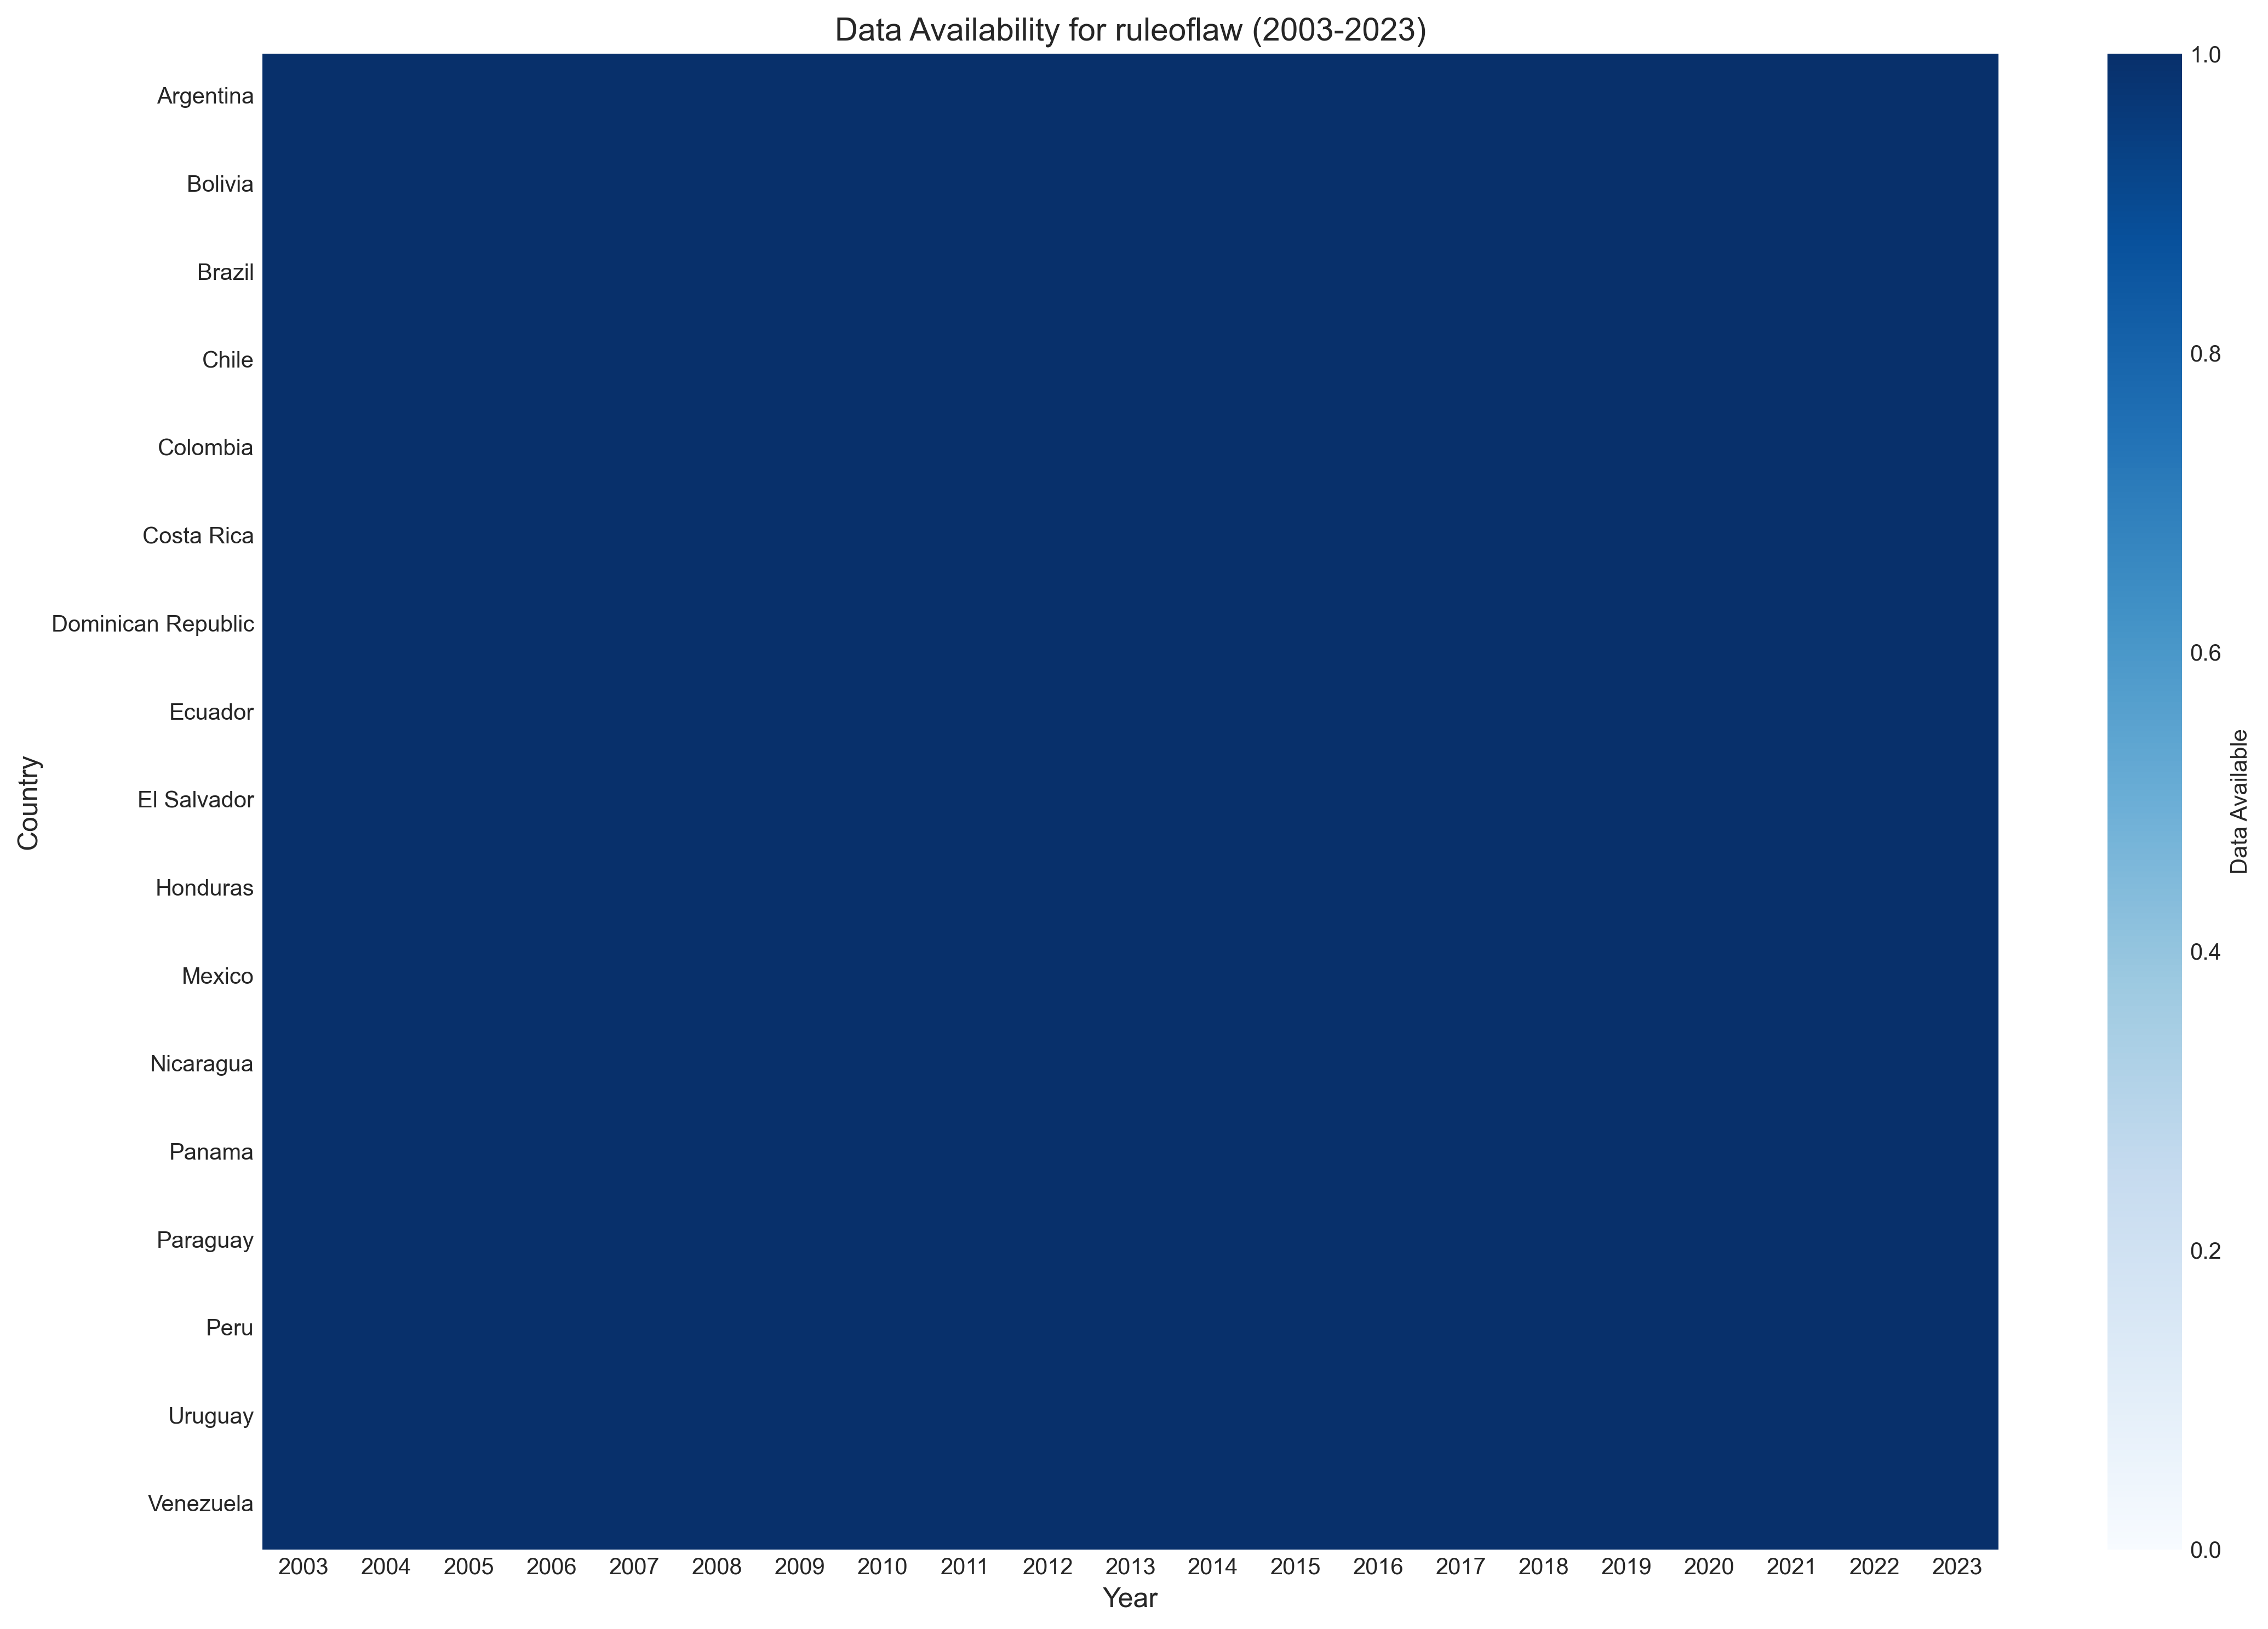

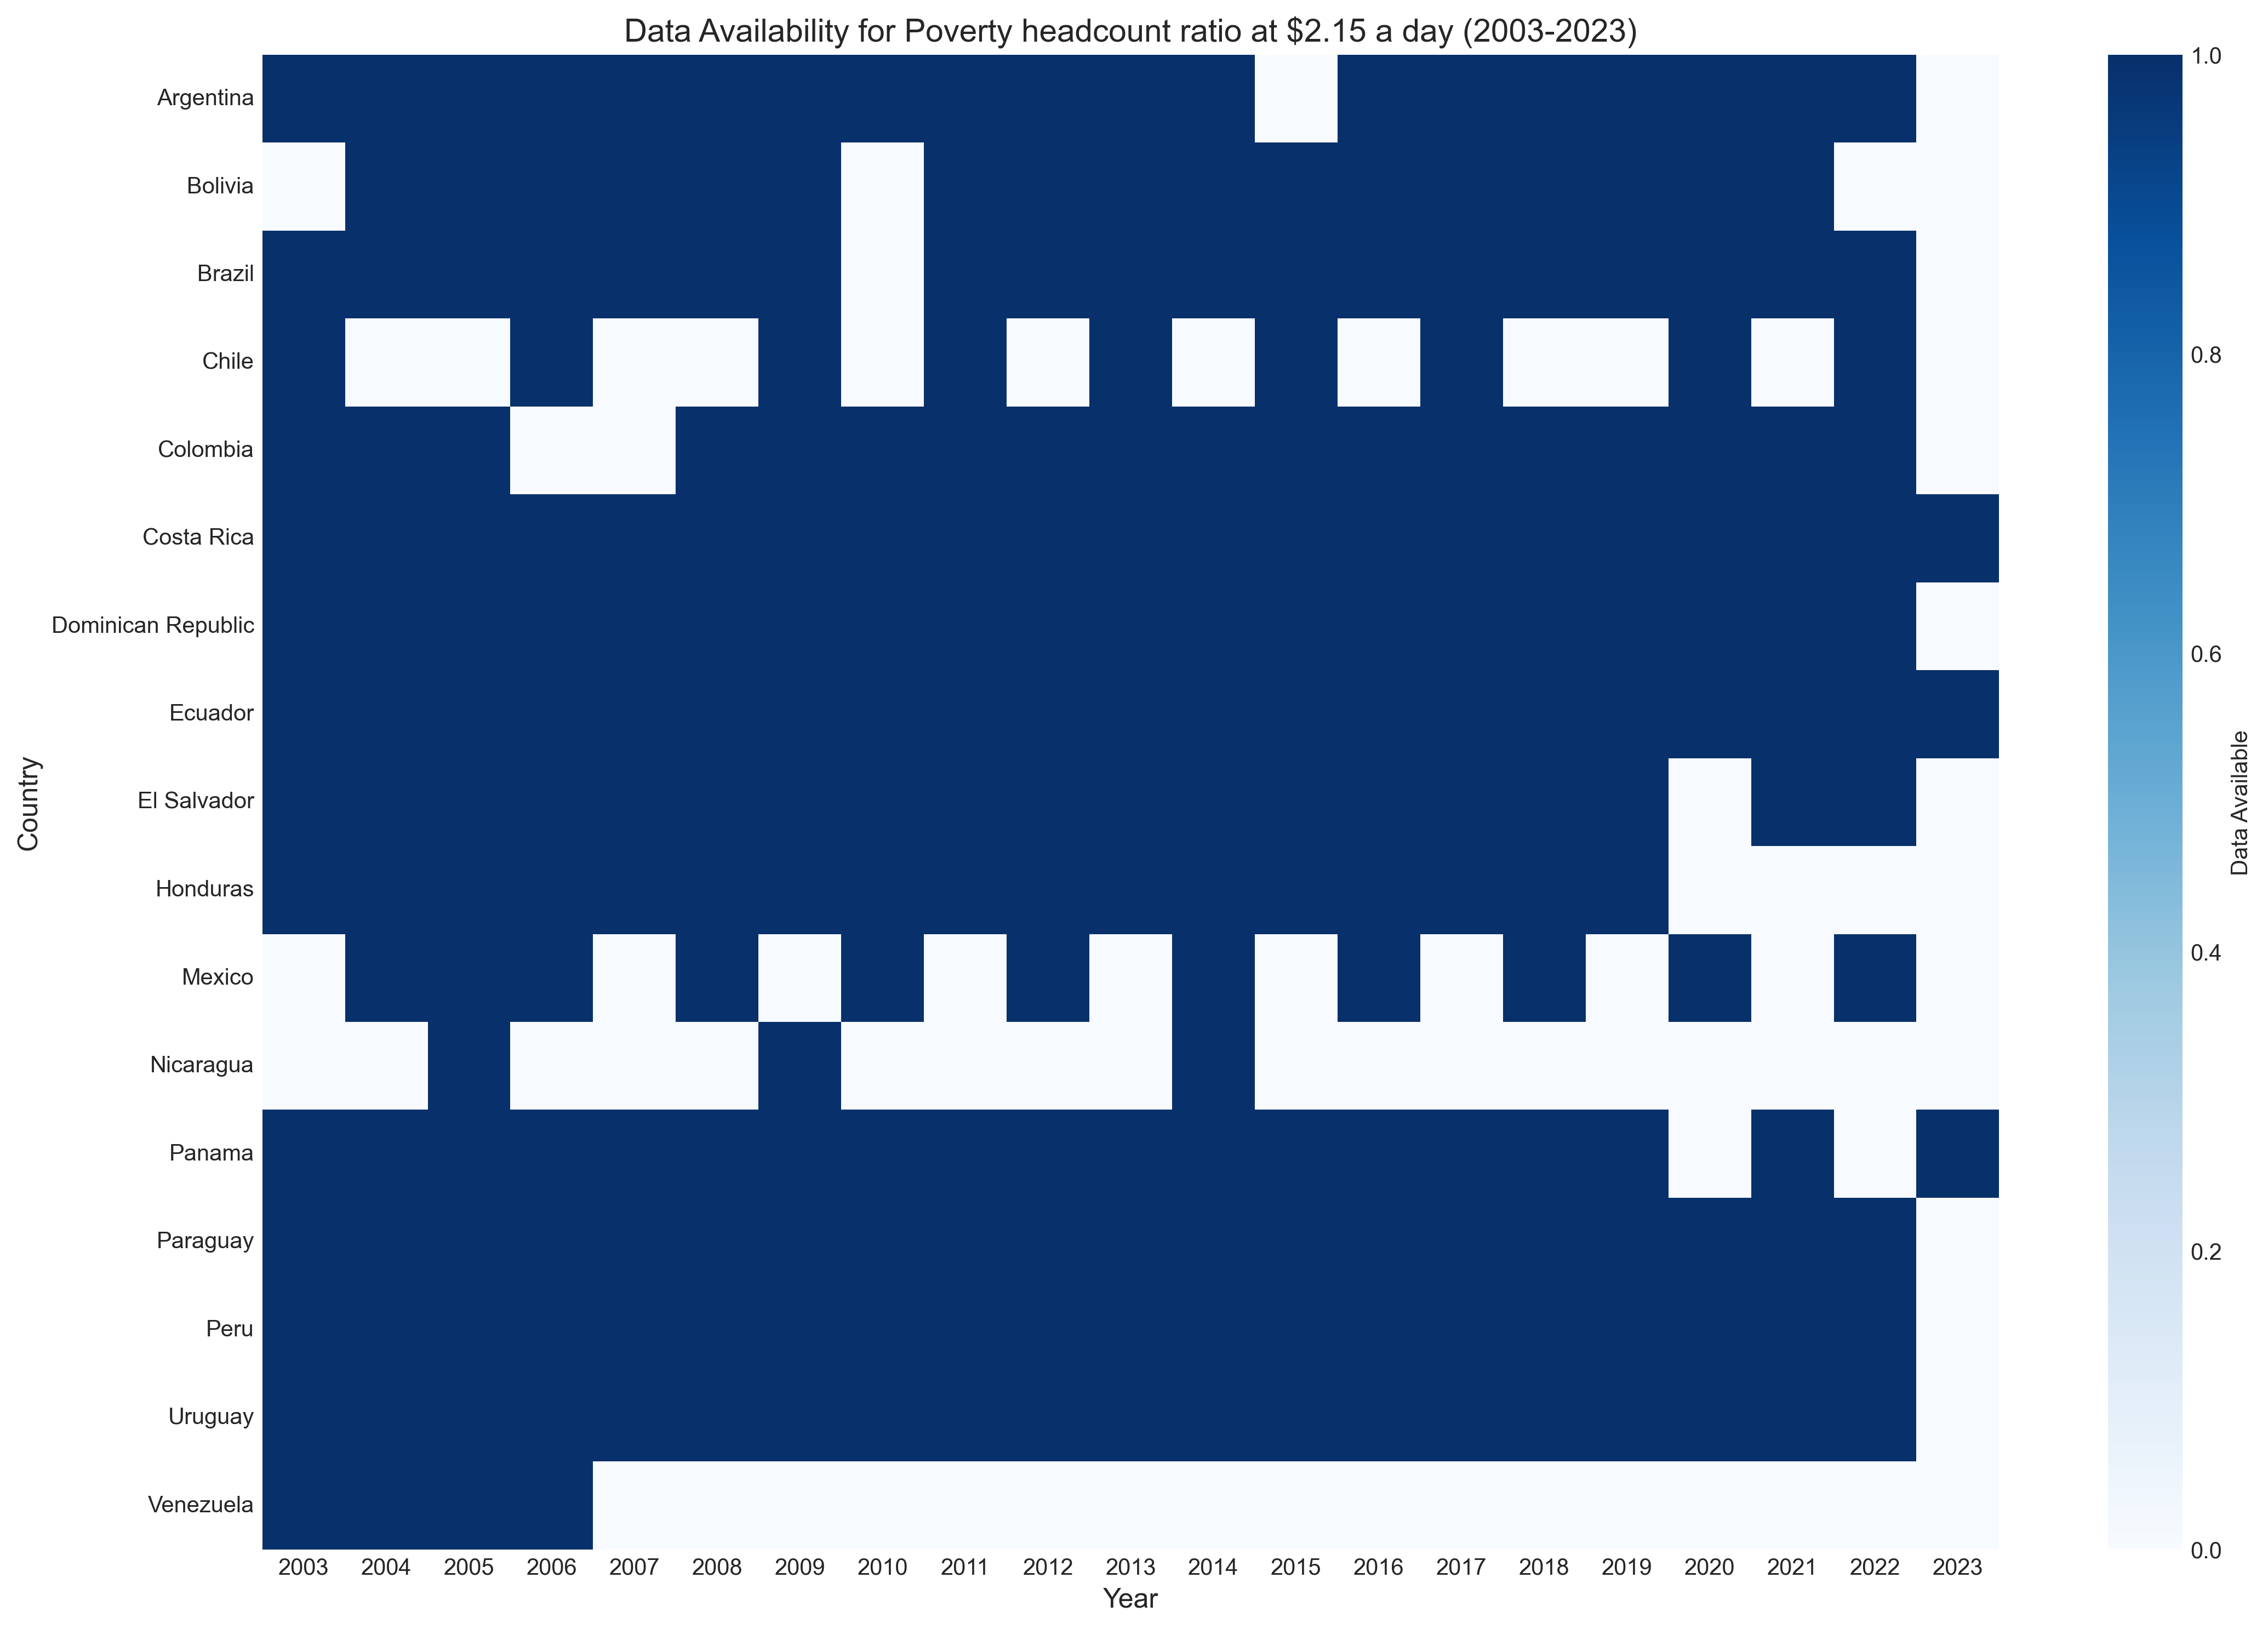

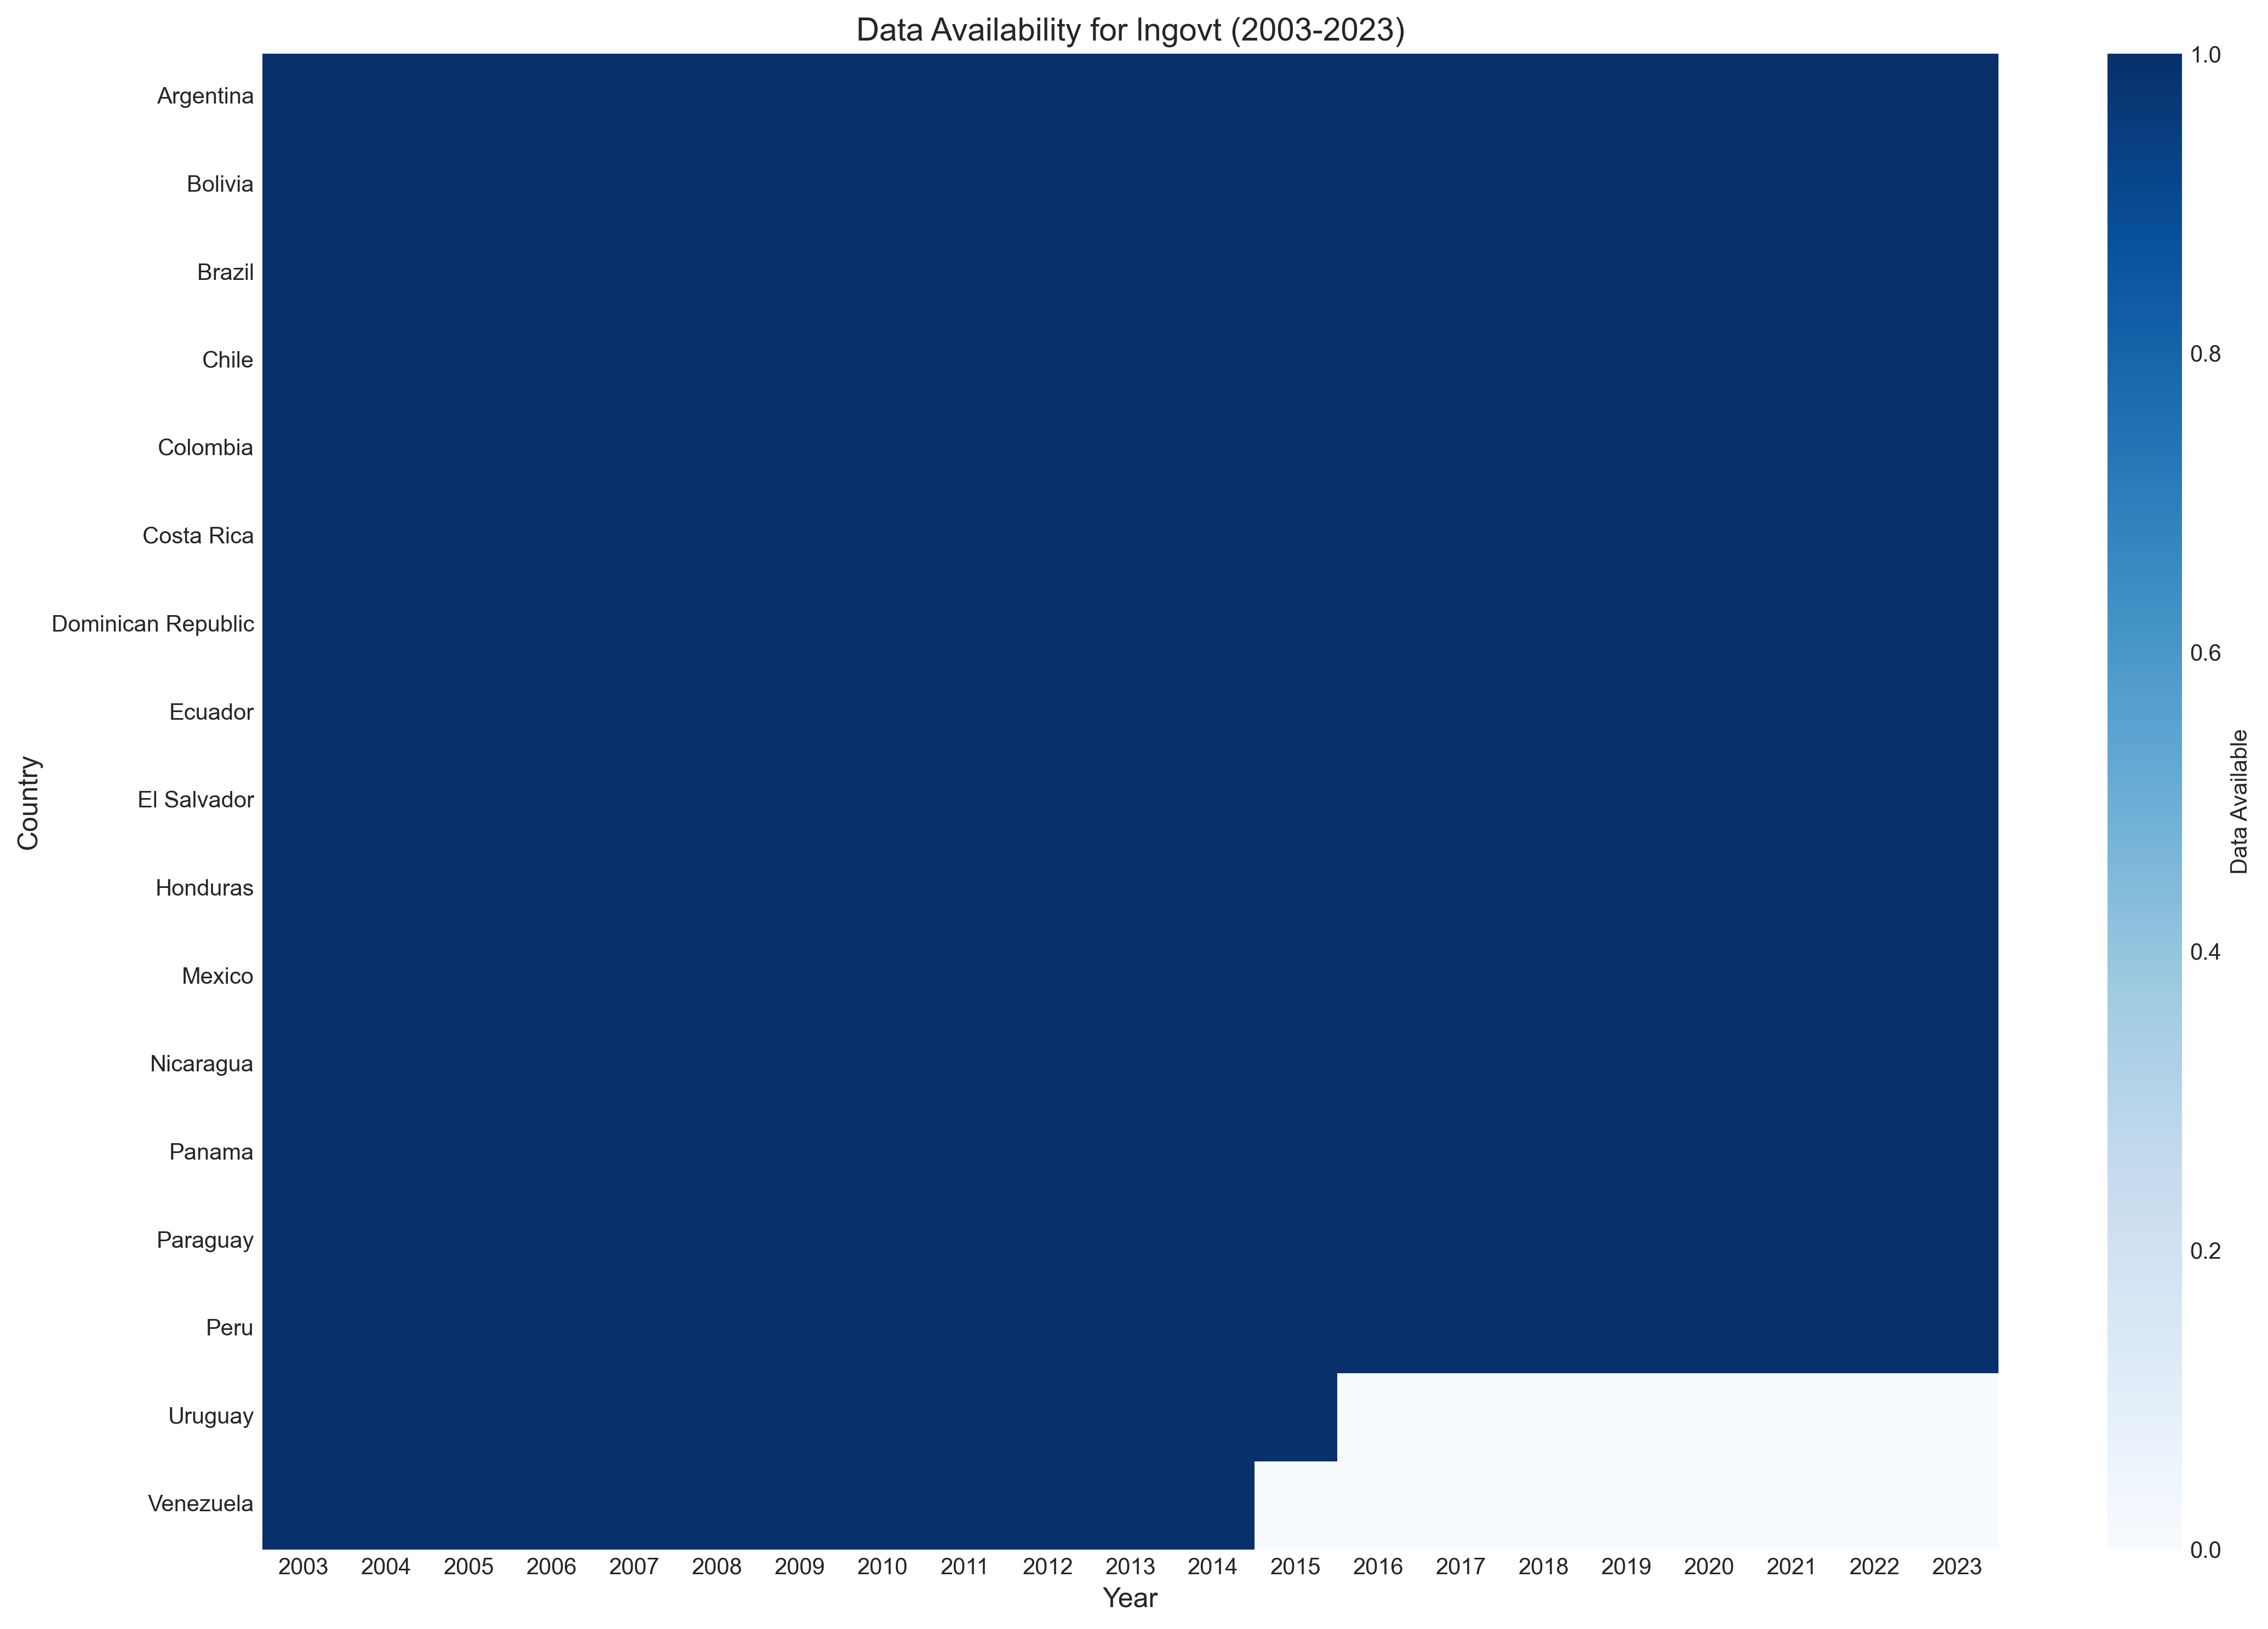

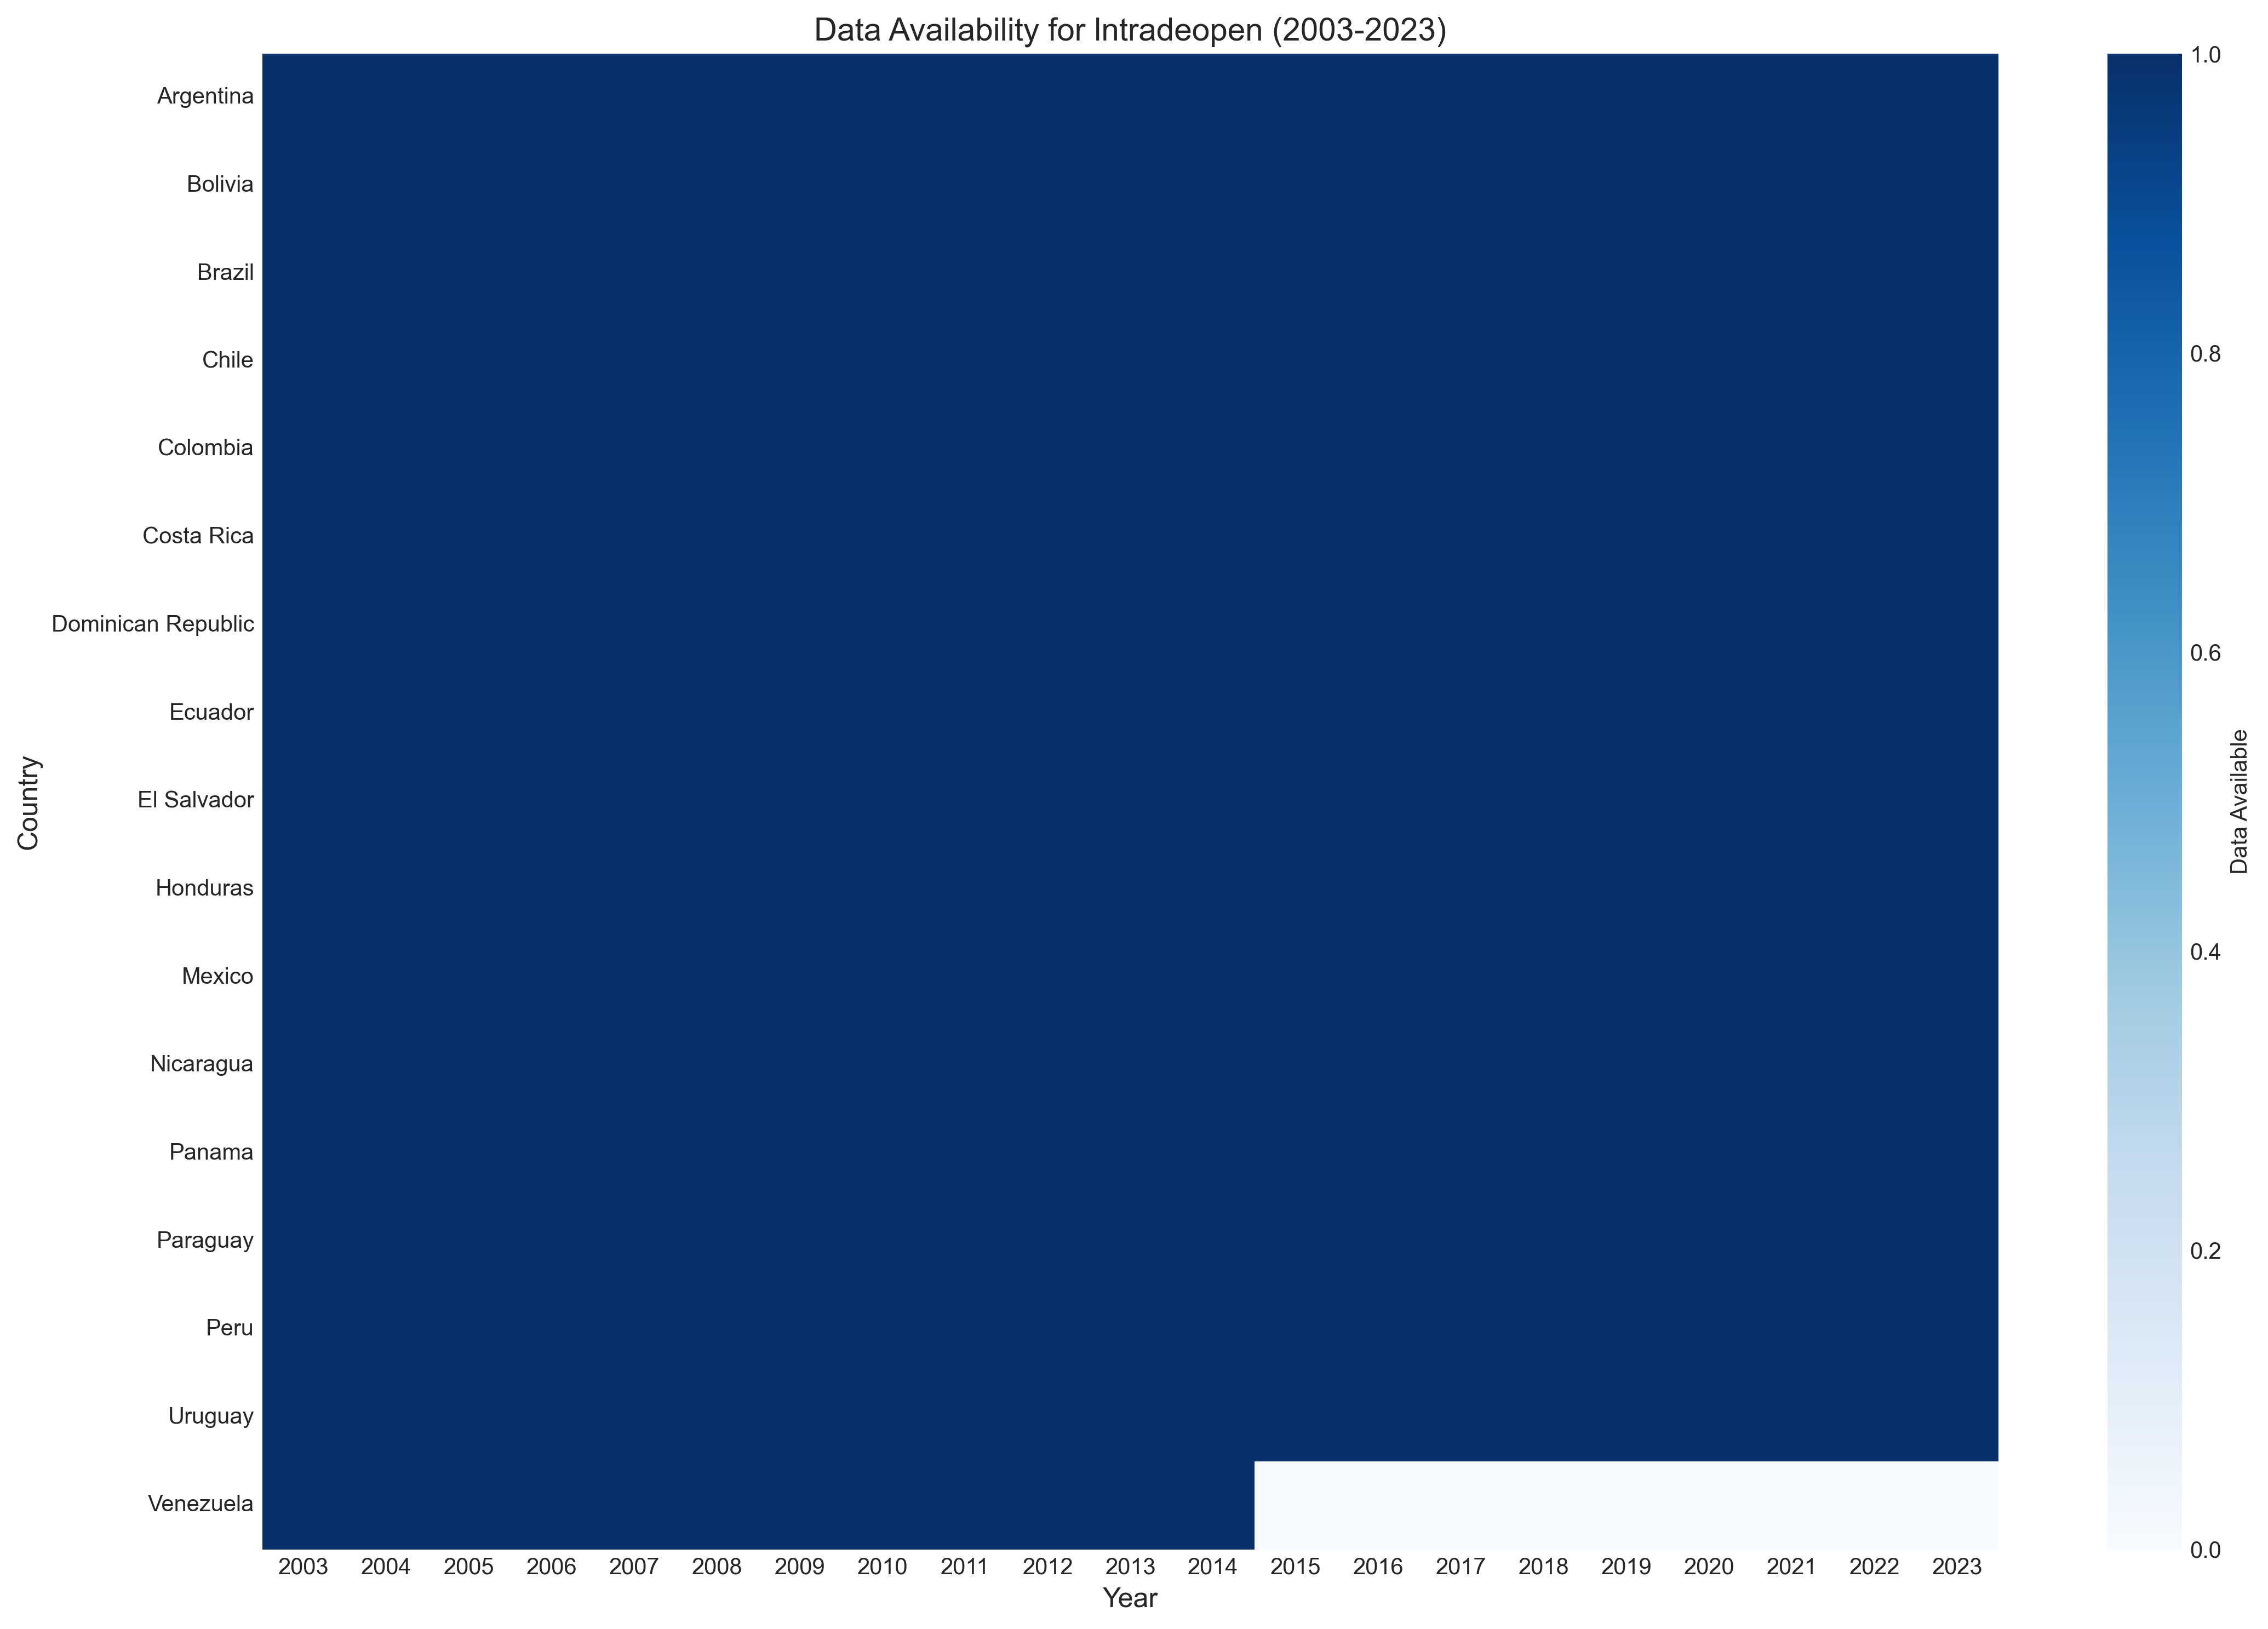

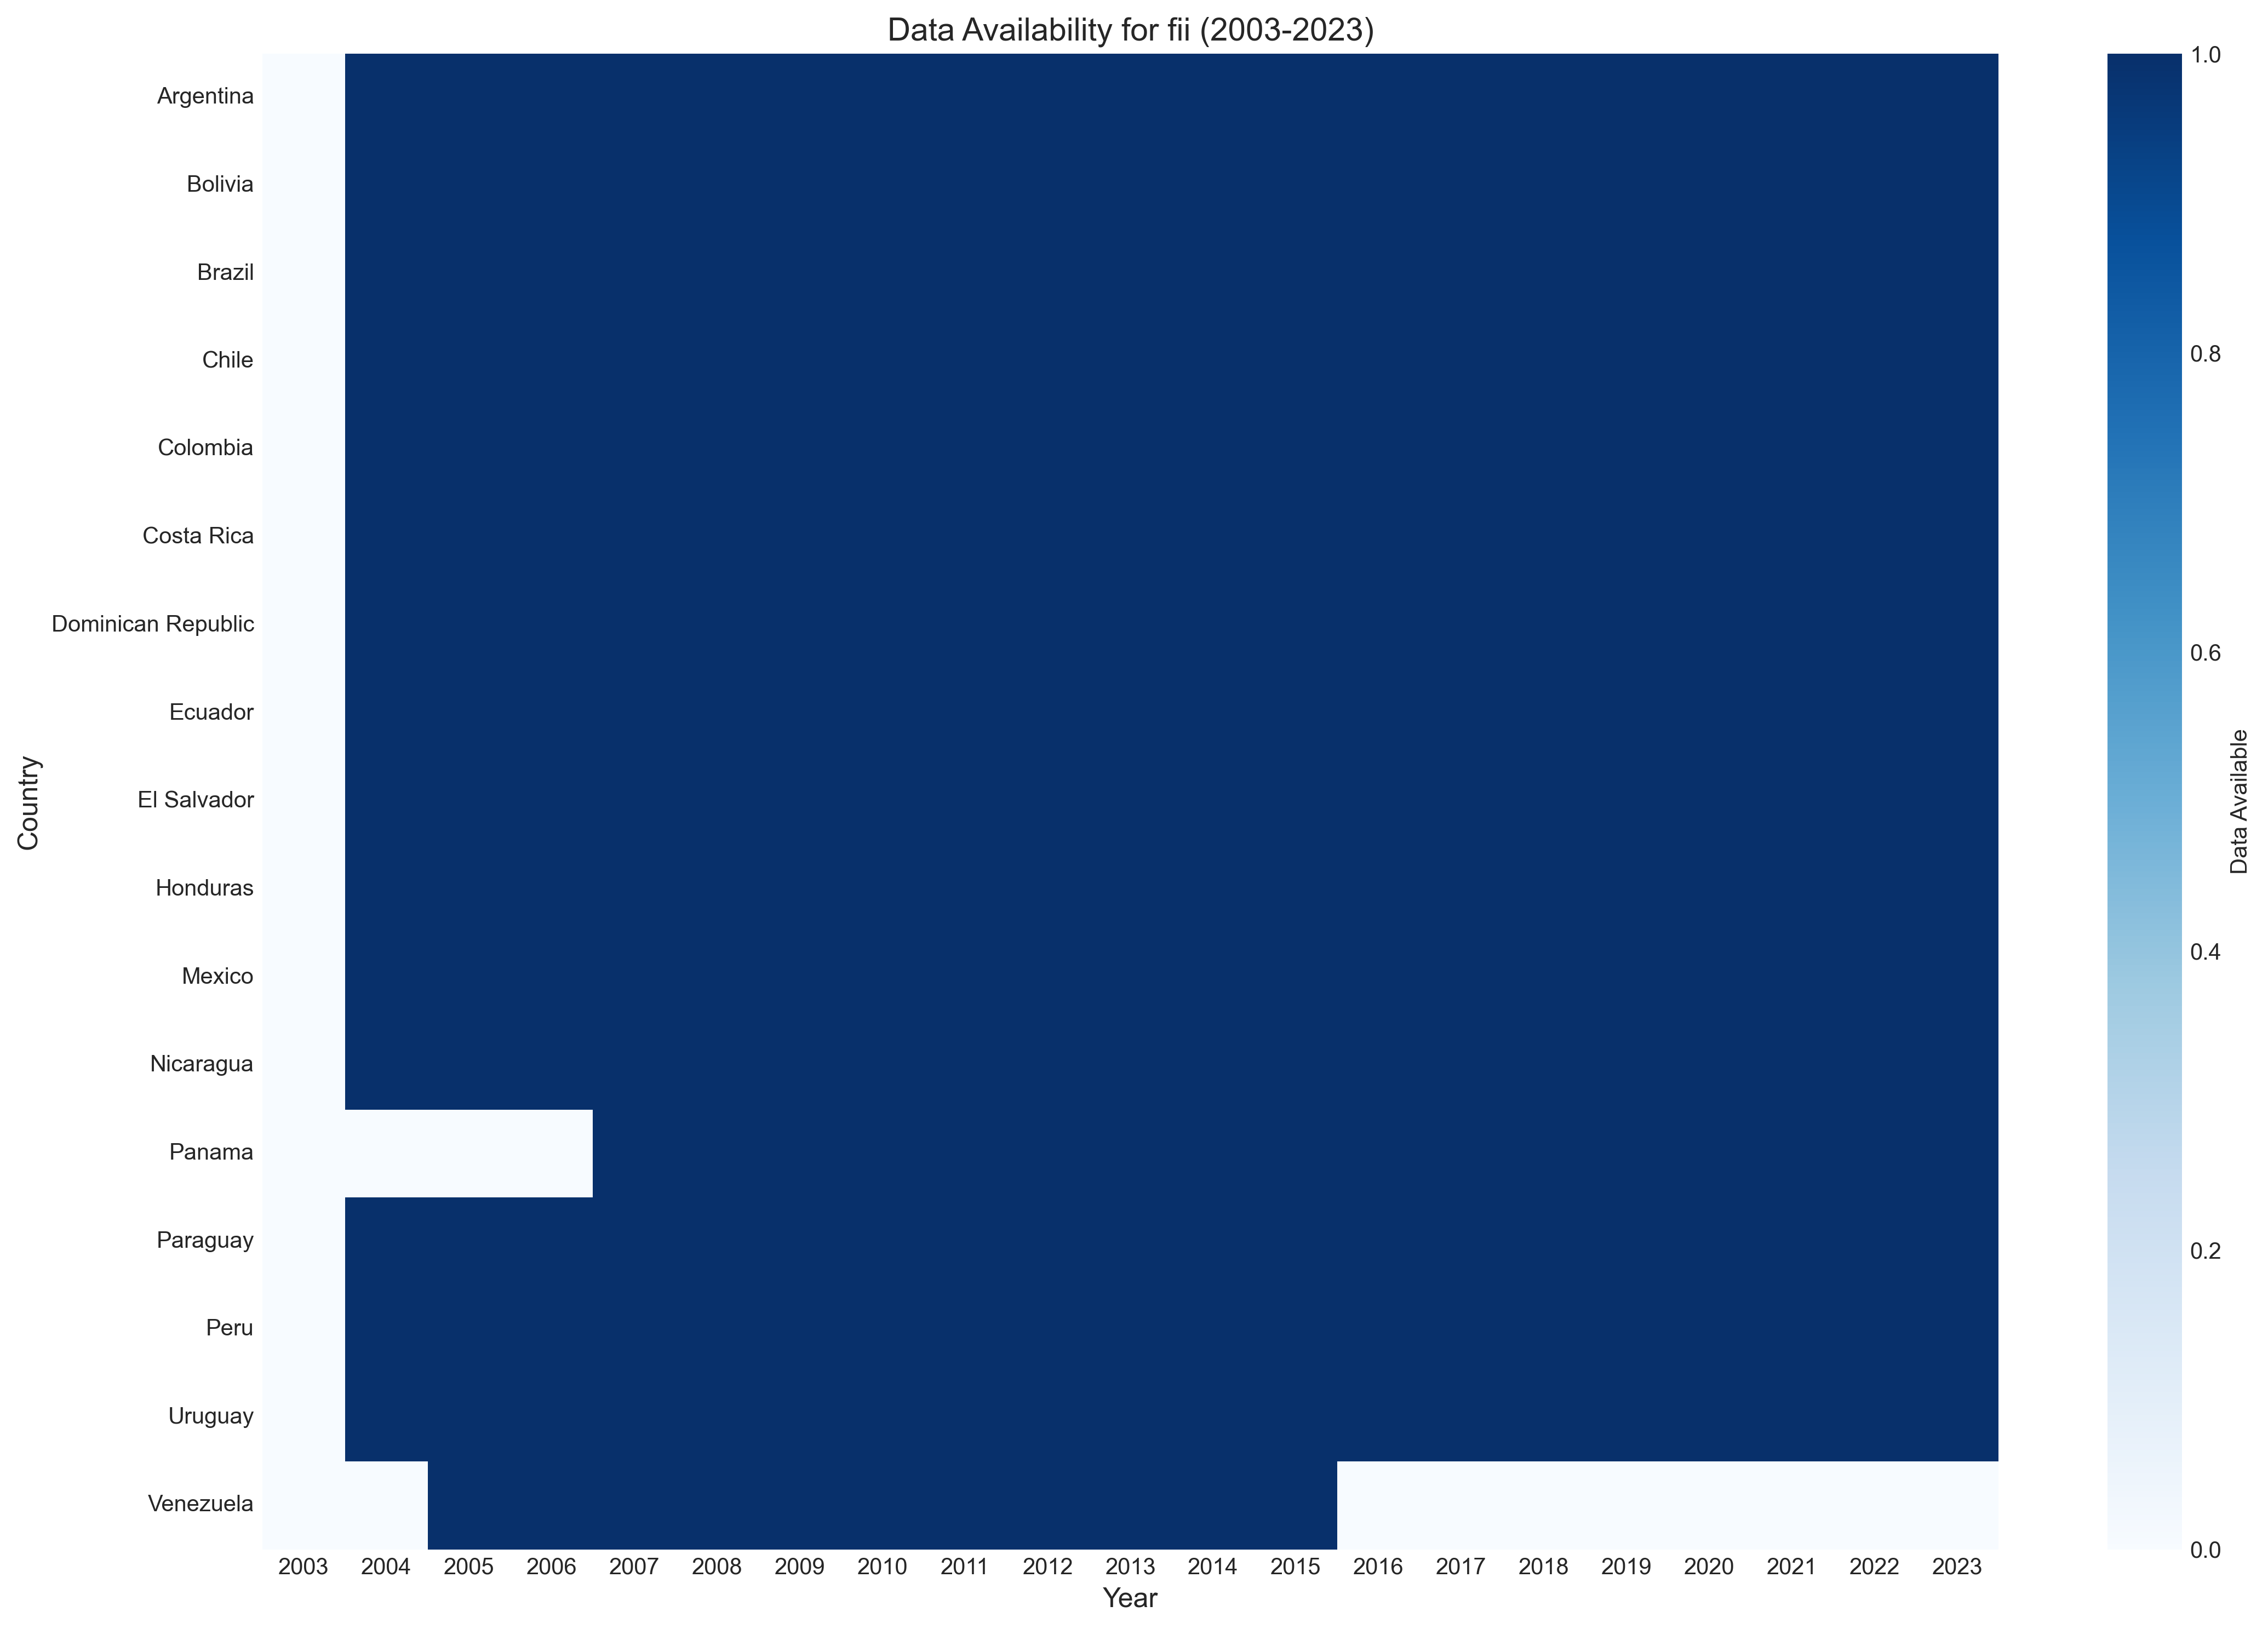

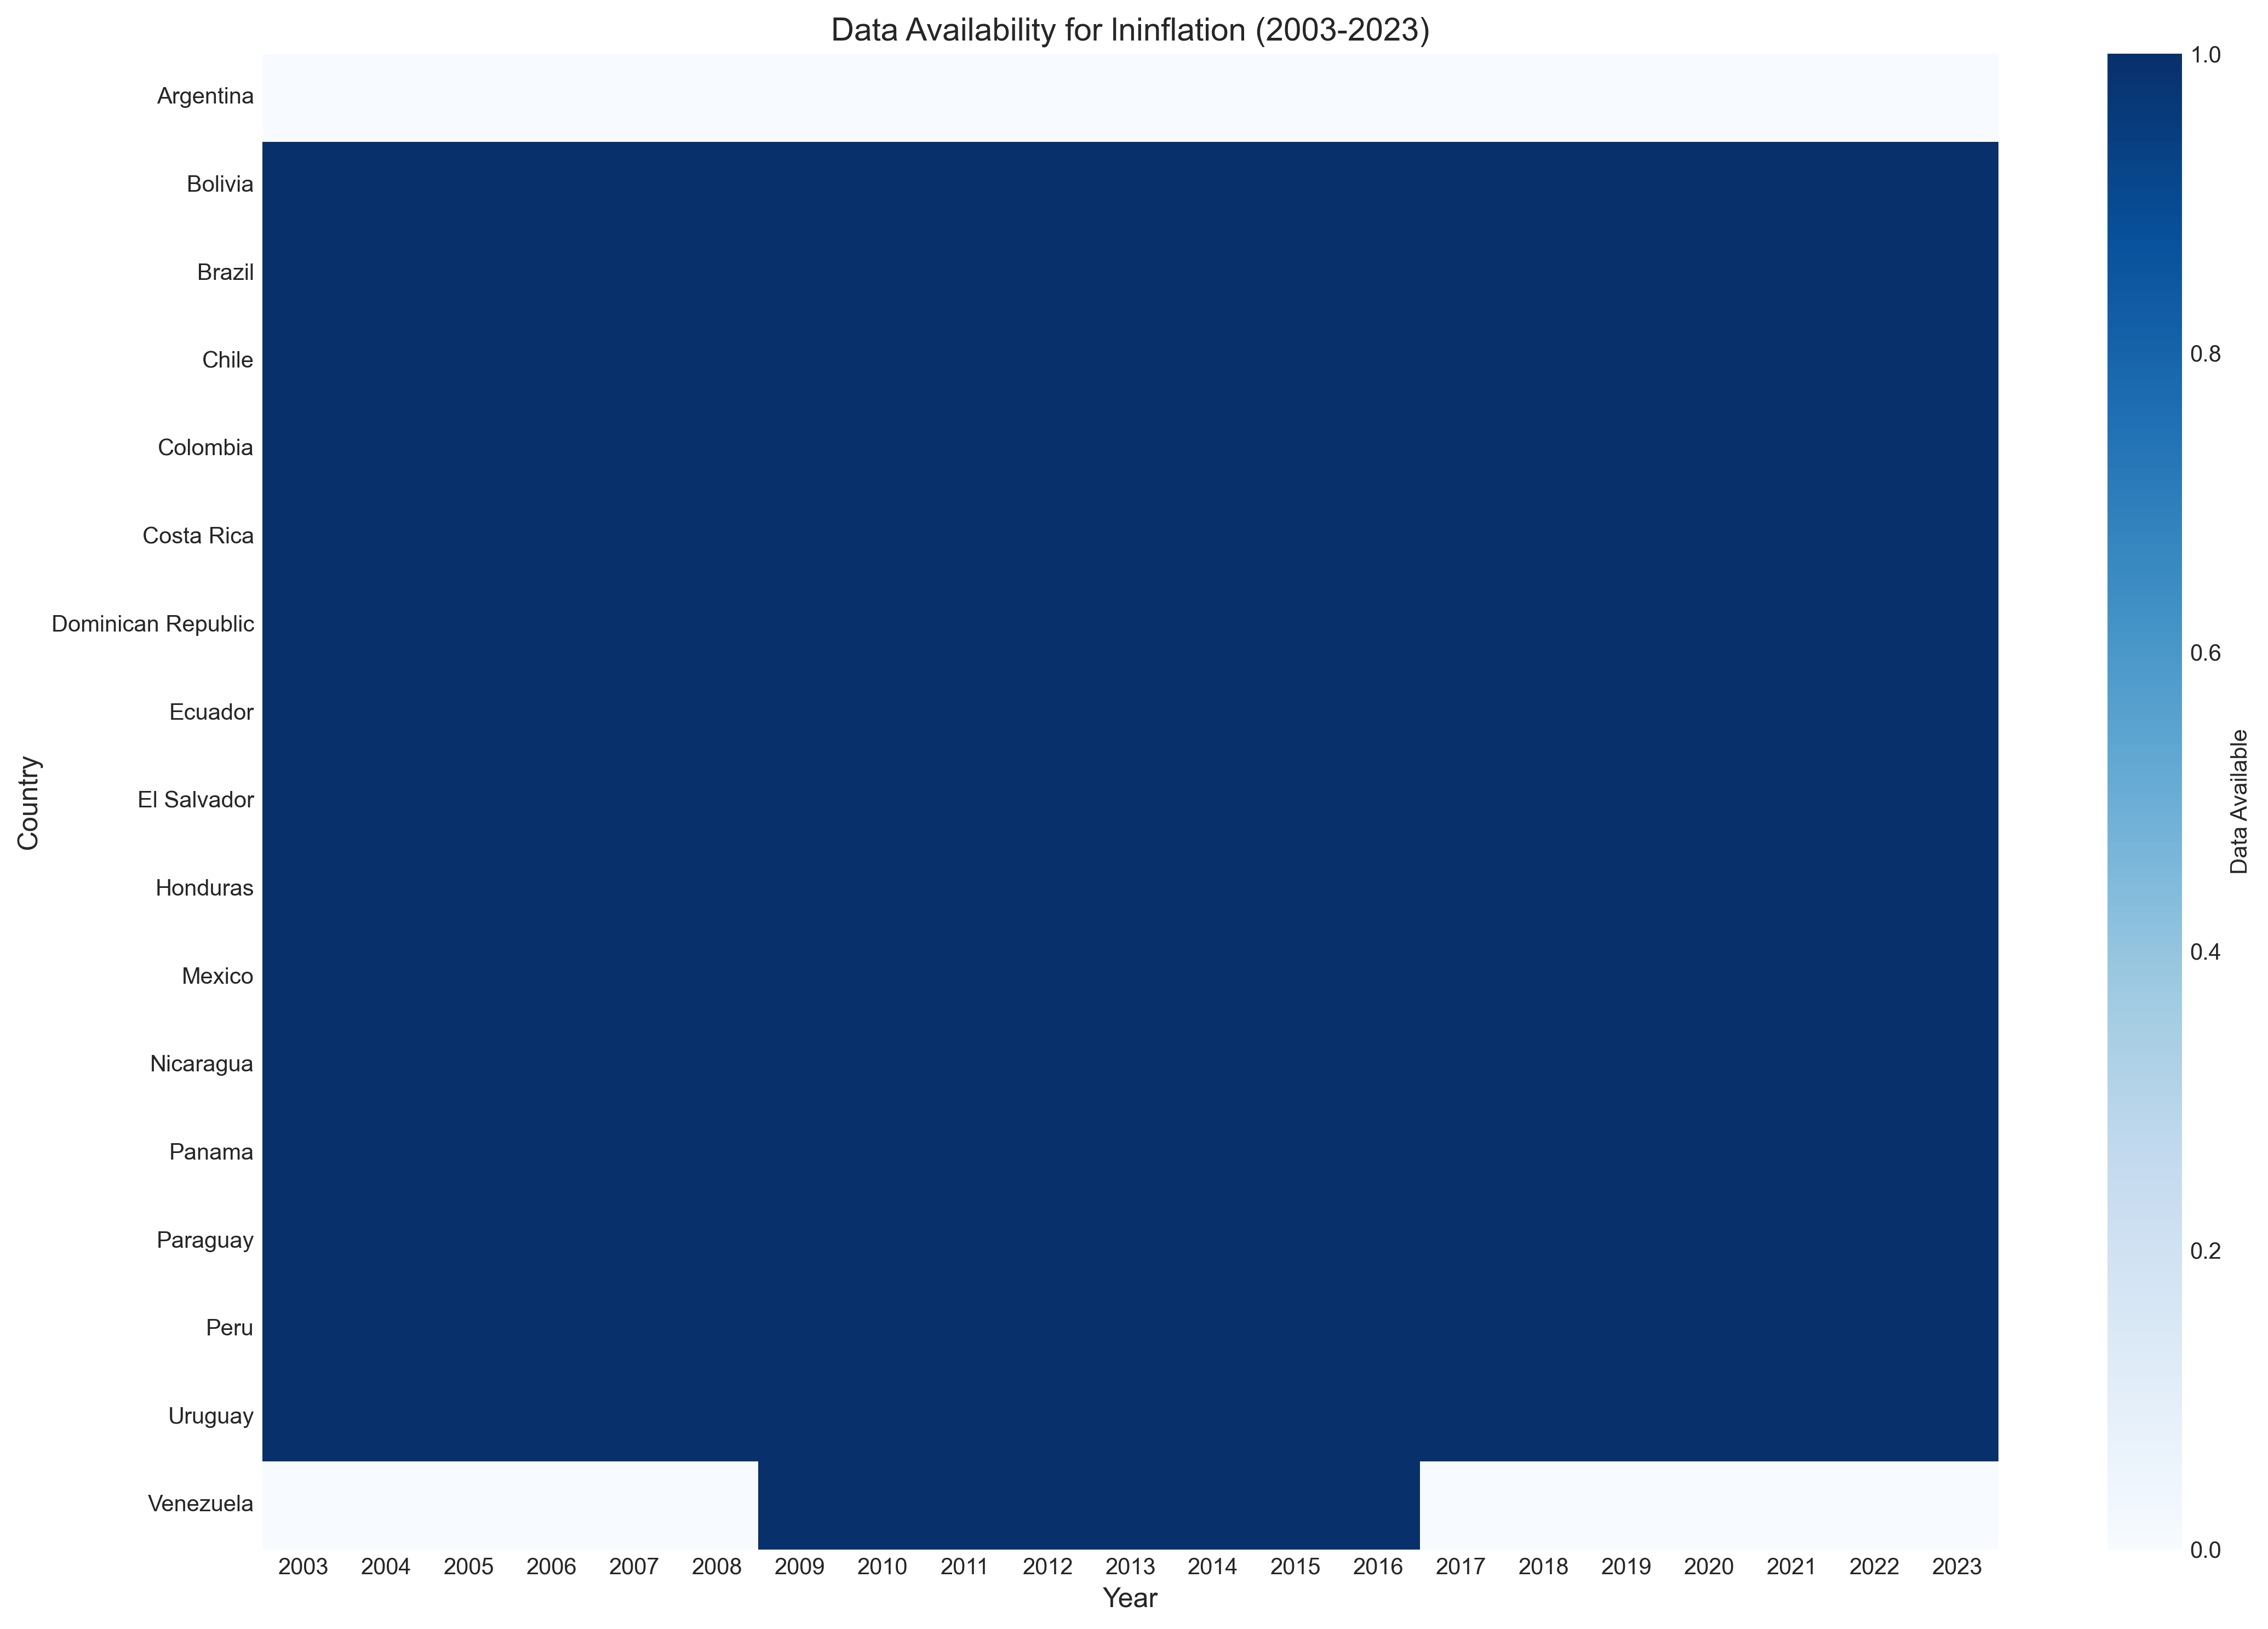

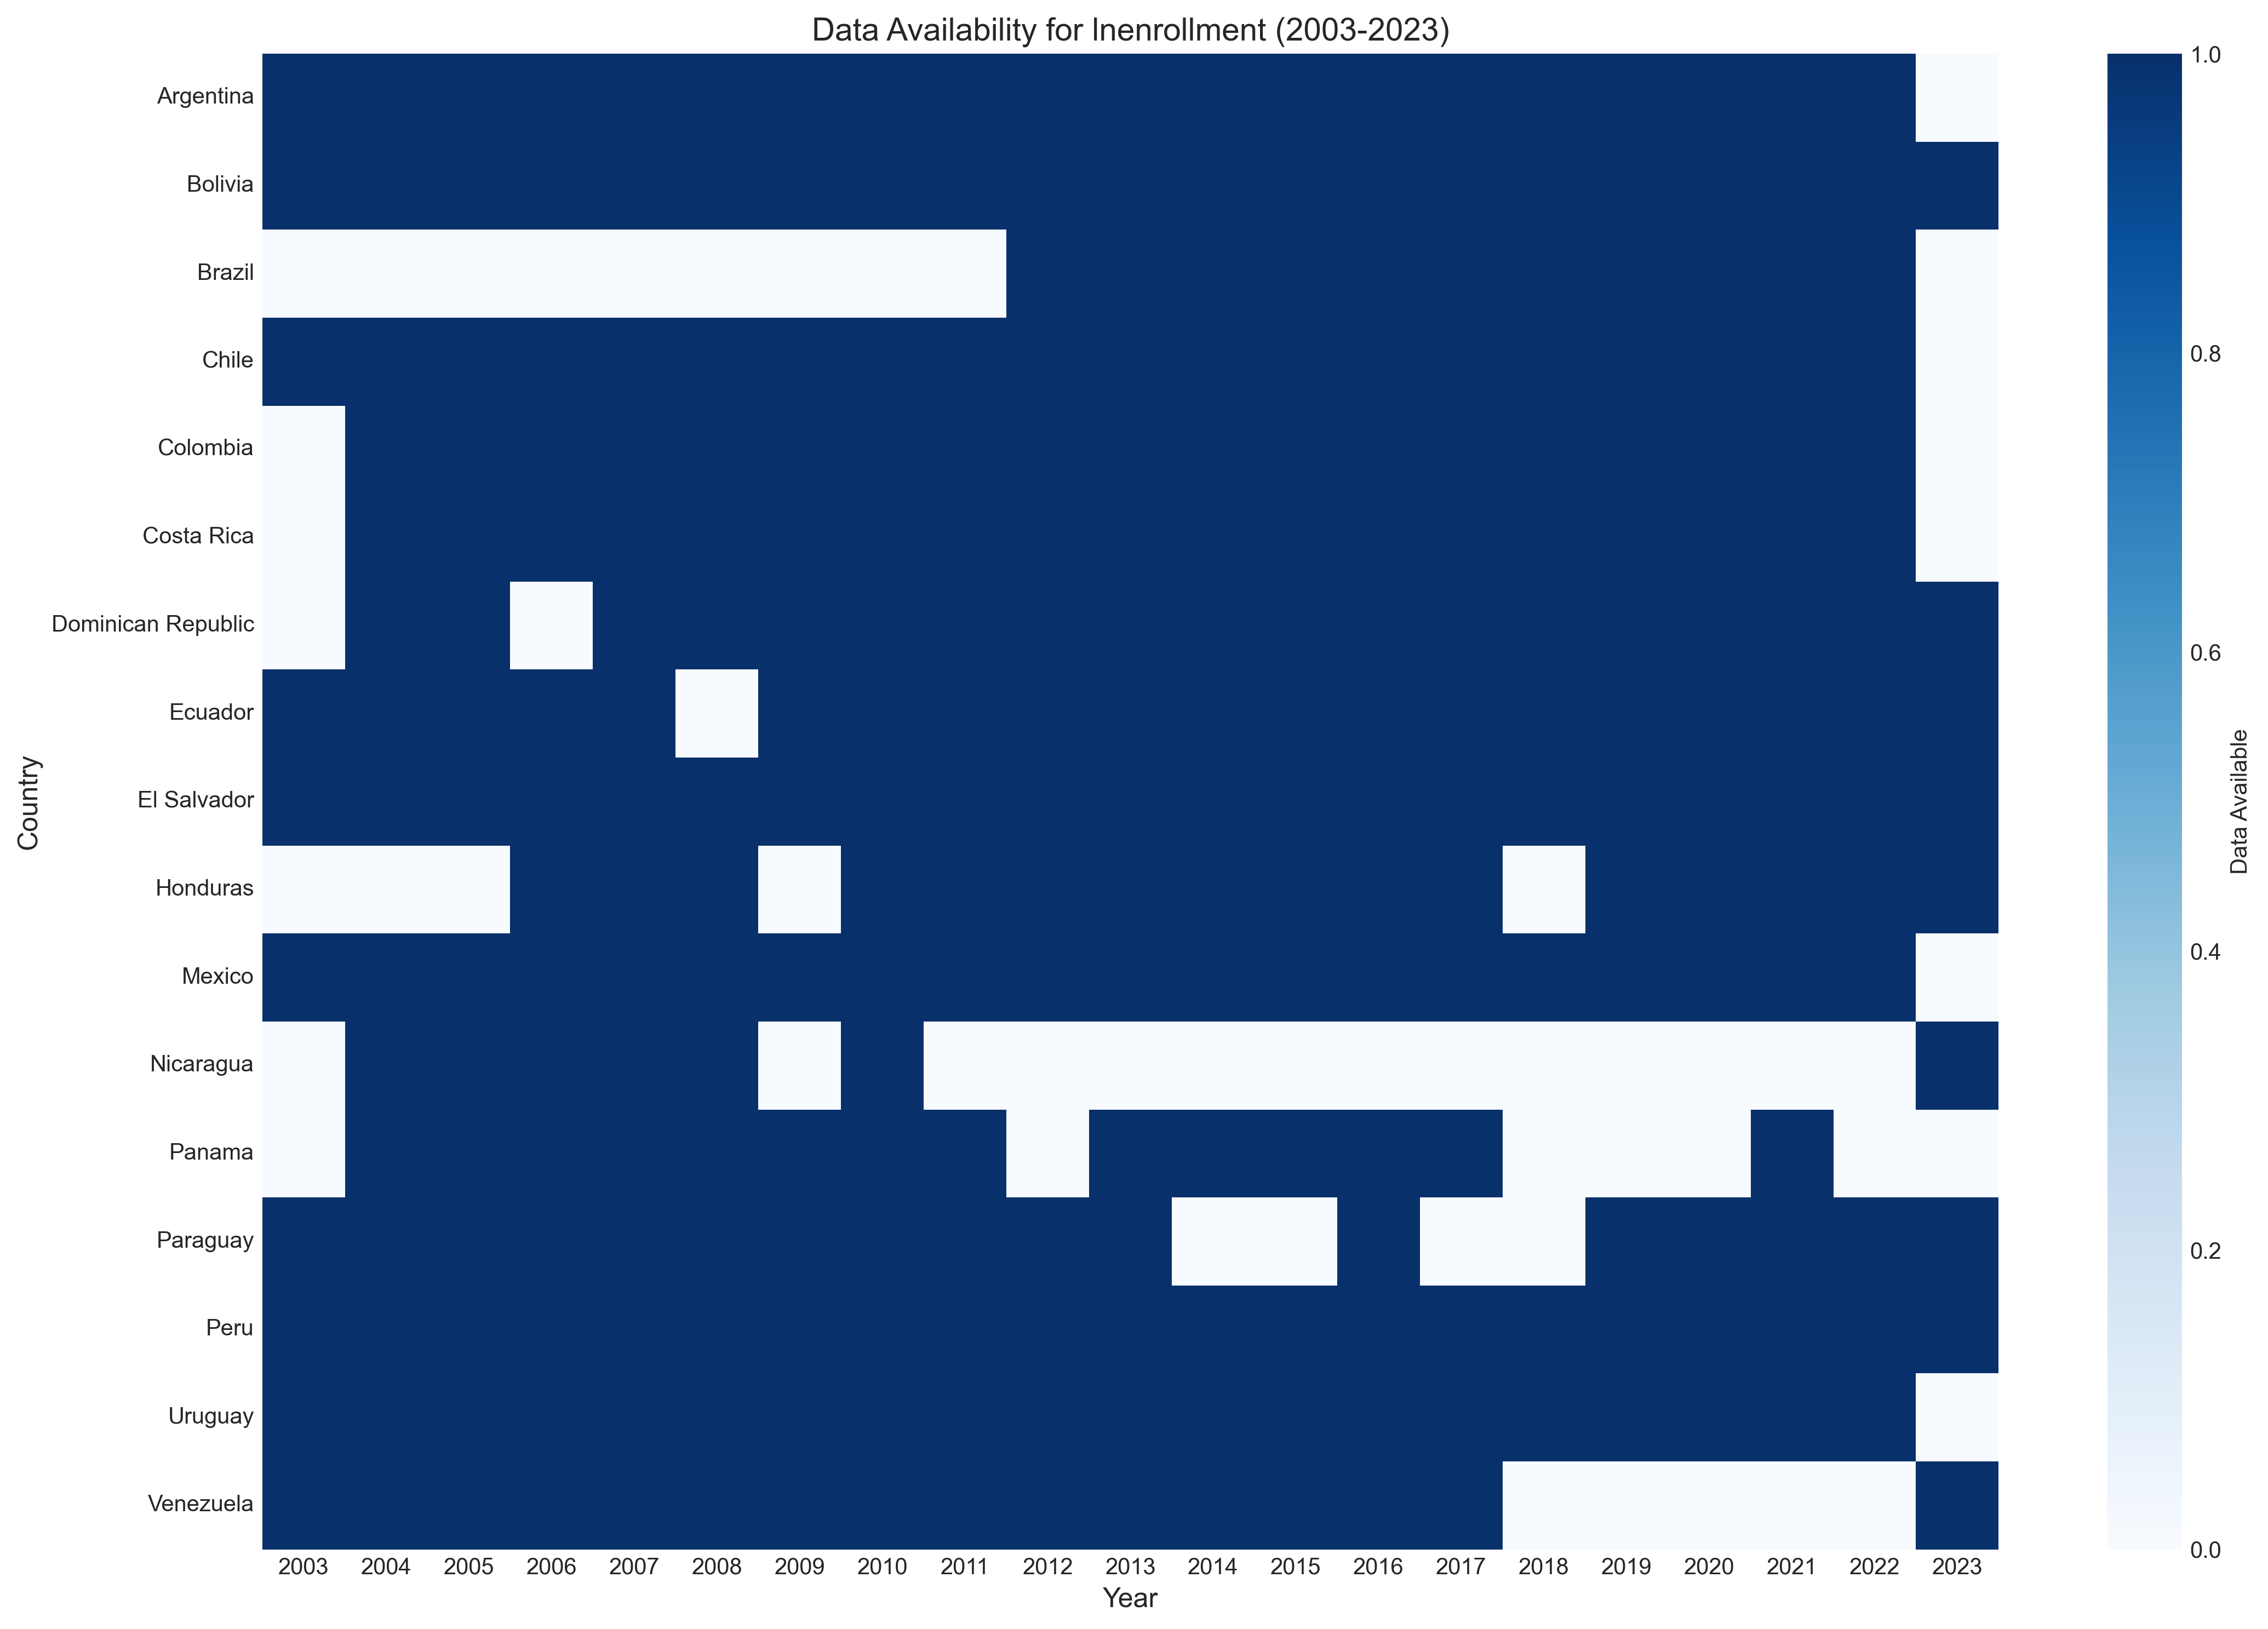

In [7]:
# Visualize missing data for all variables
plot_missing(panel, "../../reports/figures/missing_all.png")

# Define the image paths excluding 'Year' and 'Country' columns
numeric_cols = [col for col in panel.select_dtypes(include=[np.number]).columns if col not in ['Year']]
image_paths = [f"../../reports/figures/missing_all_{col}.png" for col in numeric_cols]
# Display all the images in the notebook
for path in image_paths:
    display(Image(path))

## Summary Statistics

In [5]:
# Generate summary statistics
panel.describe()

,Year,gdpgrowth,gini,wealth,gii,ruleoflaw,lnpovhead215,lngovt,lntradeopen,fii,lninflation,lnenrollment
count,357.000000,348.000000,277.000000,357.000000,315.000000,357.000000,277.000000,340.000000,348.000000,328.000000,323.000000,301.000000
mean,2013.000000,3.598123,47.955596,0.666348,0.422248,-0.462922,1.567997,2.675019,4.127029,0.439905,1.674379,4.473657
std,6.063799,4.197889,4.692773,0.044153,0.129220,0.698651,0.766245,0.193563,0.402610,0.169640,0.733581,0.195679
min,2003.000000,-17.821230,37.000000,0.586300,0.114000,-2.331935,0.095310,2.131805,3.140091,0.085530,-0.936201,3.915528
25%,2008.000000,2.073083,44.700000,0.640900,0.366000,-0.850291,0.955511,2.523009,3.893994,0.327069,1.339187,4.348954
50%,2013.000000,4.022938,48.100000,0.660700,0.417000,-0.566743,1.609438,2.691081,4.144196,0.428163,1.676601,4.510958
75%,2018.000000,5.765777,51.400000,0.697700,0.454500,-0.203980,2.128232,2.818402,4.396339,0.573518,2.075244,4.618810
max,2023.000000,18.286607,59.500000,0.795400,1.120000,1.348704,3.314186,3.062423,5.109492,0.794251,5.544976,4.957254


## Distribution of Key Variables

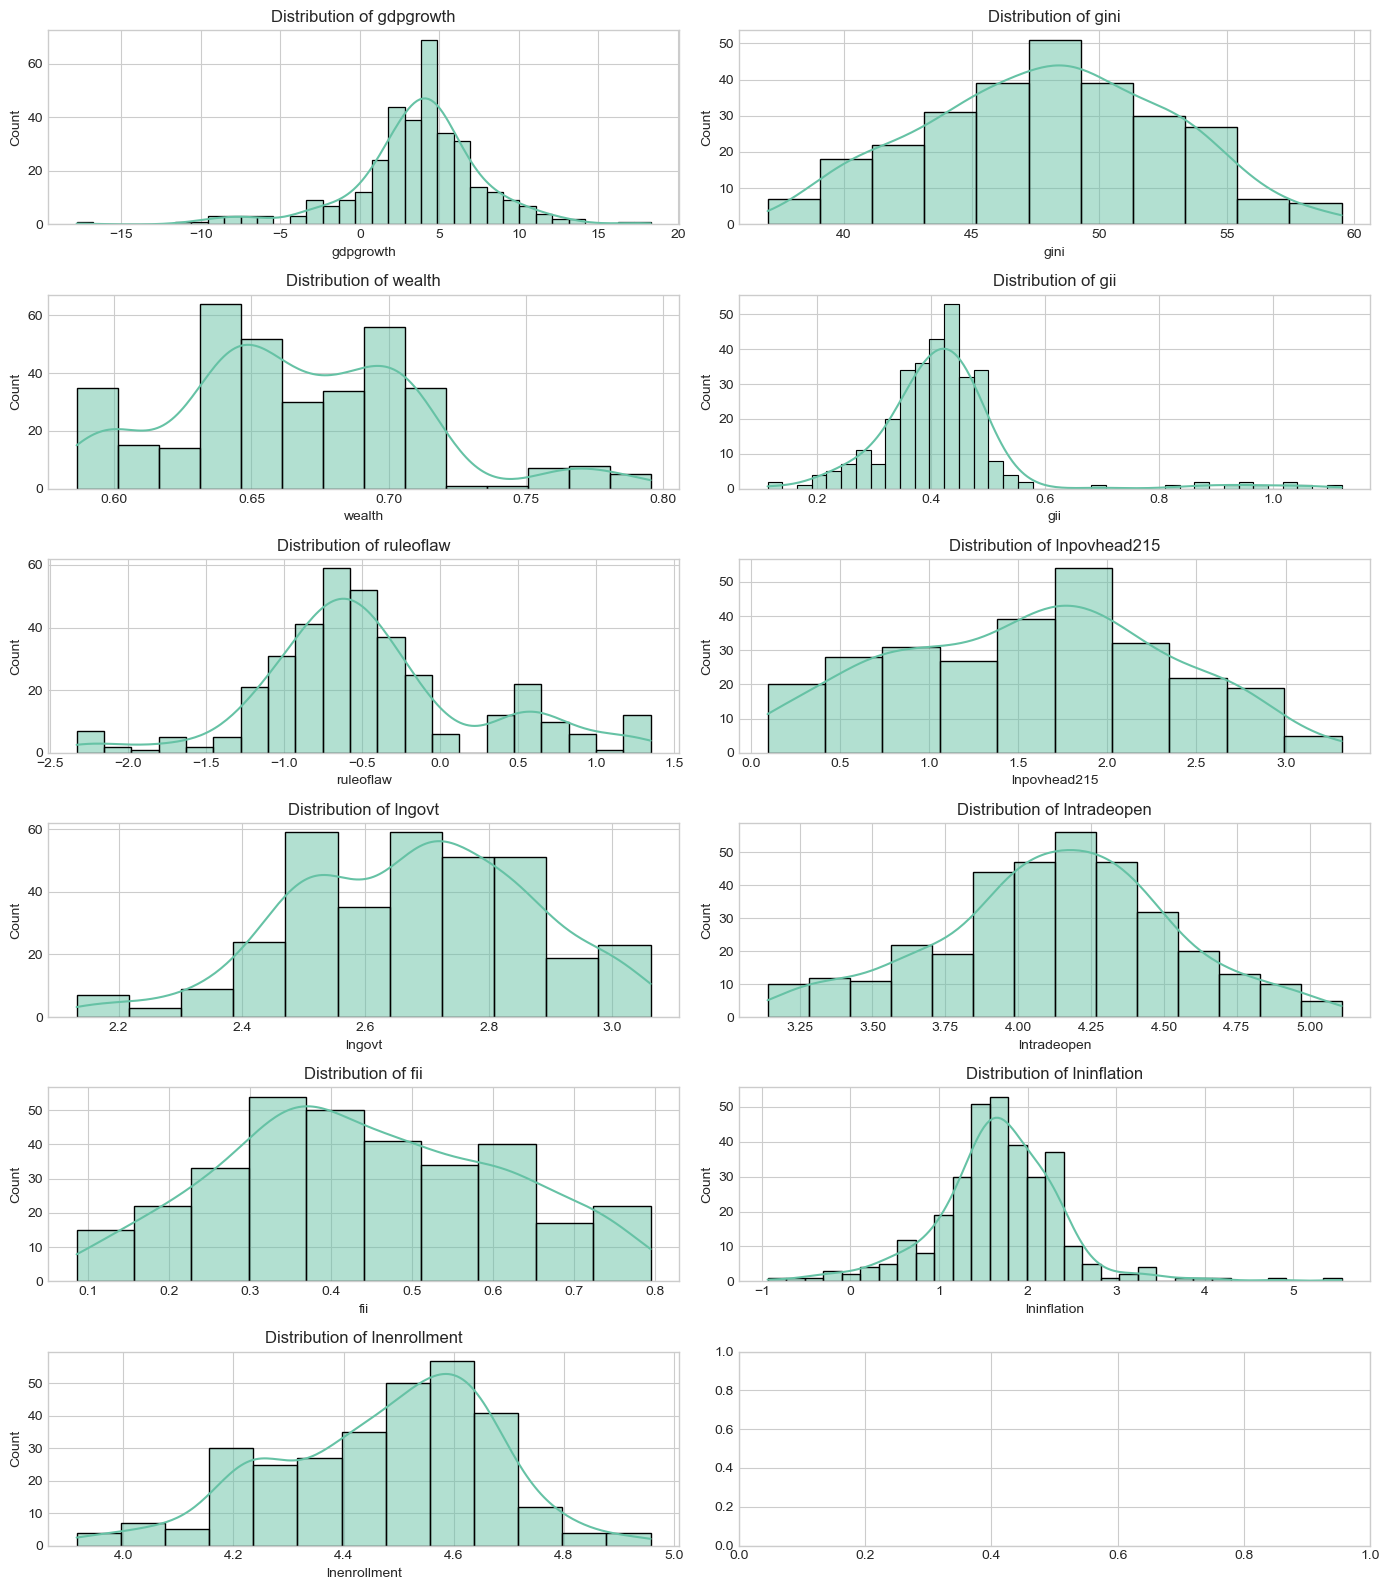

In [6]:
# Plot histograms for key variables
numeric_cols = panel.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Year']

fig, axes = plt.subplots(nrows=len(numeric_cols)//2 + len(numeric_cols)%2, ncols=2, figsize=(14, 3*len(numeric_cols)//2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(panel[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.savefig("../../reports/figures/variable_distributions.png", dpi=300, bbox_inches='tight')
plt.show()